In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
#import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map



1.4.4


/tmp/ipykernel_40364/505953461.py:40: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.4.4


In [3]:
from matplotlib import rcParams as rc
rc.update({'font.size': 22,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 22,\
           'ytick.labelsize' : 22,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [4]:
#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15, if_axis=0):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=0.78 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    if (if_axis==1):
        ax.set_xlim([x_min,x_max])
        ax.set_ylim([y_min,y_max])    
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.minorticks_on()
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.tick_params(which='both',direction="in")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc





In [5]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [6]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
f = open('/home/sanchez/sda2/code/colortables/CLC_vmap.csv', 'w')
for i in range(color_cm_now.N):
    val=color_cm_now(i)
    val_str=f'{val[0]},{val[1]},{val[2]},{val[3]}\n'
#    f.write("Hello, World!\n")
#    print(val_str)
    f.write(val_str);
f.close()

In [7]:
from matplotlib import rcParams as rc
rc.update({'font.size': 22,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 22,\
           'ytick.labelsize' : 22,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [8]:
def plot_2Dhist(x_par=None,y_par=None,z_par=None,\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]    
    if (labels_zbins==None):    
        labels_zbins=np.zeros(n_zbins)
    #print(labels_zbins,delta_z)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
#        print(z_bins,z_bin_min,z_bin_max)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
#        print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig('fig/'+figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
    
    
    


In [9]:
def plot_2Dhist_map(x_par=None,y_par=None,z_par=None,\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear',contour=0,\
                   if_fit=0,conts=[0.95,0.65,0.40],med=0):

    fig = plt.figure(figsize=(8,6))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)

#    colormap = plt.cm(color_cm_now)
    #ax.scatter(x_par, y_par, s=size_scatter*3, \
    #           alpha=0.1*alpha,edgecolor='none',color='black',\
    #           rasterized=True,label=label)
    
#    for indx in arange(n_zbins):
    
#    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
#               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    
#    print(mapcolors)
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    X=[]
    Y=[]
    C=[]
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        #print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
        new_cmap=truncate_colormap(colormap, minval=indx/n_zbins-0.05, maxval=indx/n_zbins+0.05, n=3)
        if (med==0):
            x_mean=np.mean(x_par[mask_z_par])
            y_mean=np.mean(y_par[mask_z_par])
        else:
            x_mean=np.median(x_par[mask_z_par])
            y_mean=np.median(y_par[mask_z_par])
        X.append(x_mean)
        Y.append(y_mean)
        C.append(indx)
        print(labels_zbins[indx],x_mean,y_mean,y_mean/x_mean,y_mean-x_mean)
        my_contourf(ax,x_par[mask_z_par],y_par[mask_z_par],\
                   x_min,x_max,y_min,y_max,c_color=mapcolors[indx],\
            nbins=25,title=label,linewidths=3,alpha=0.6*alpha,\
                   conts=[0.85,0.01],cmap=new_cmap,colors=1)
#    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    

    
    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
#    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)
    
    if (contour==1):
        my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
                   nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,zorder=100)
#    cmap_truncate=truncate_colormap(colormap, n=n_zbins)
    cmap_now = LinearSegmentedColormap.from_list('cmap_now', mapcolors, N=len(mapcolors))
    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
               cmap=cmap_now,alpha=alpha)

#    ax.scatter(X,Y,edgecolor='black',s=150,c=C,vmin=np.min(C),vmax=np.max(C),linewidths=3,\
#               cmap=cmap_truncate,alpha=alpha)
   
    if (if_fit==1):
        pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax,\
                                              x_par,\
                                              y_par,\
                                              z_par,\
                                              x_min,x_max,y_min,y_max,z_min,z_max,'',\
                                              '',-2,title='', fit_title='', Delta=(x_max-x_min)/50,\
                                             if_contour=0, if_bin=1, if_scatter=0, max_c=0.95,den_par_min=0.85)
        x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
        y_plot=pa1[0]+pa1[1]*x_plot
        fact=1.0
        l_b=np.round(pa1[0],2)
        l_a=np.round(pa1[1],2)
        r_now=rc[0,1]
        l_r=np.round(r_now,2)
        l_s=np.round(s_dy_par*fact,2)
        label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
        p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black',\
                        color ='black',zorder=10,label=label,alpha=0.85)

        
    ax.set_xlabel(x_label, fontsize=25)
    ax.set_ylabel(y_label, fontsize=25)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
#    ax_histy.set_ylim(y_min,y_max)
#    ax_histx.set_xlim(x_min,x_max)
    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label).set_zorder(10000)#,\
#             framealpha=None)
#.set_zorder(100)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    return fig,ax
#    fig.tight_layout()
#    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

##########

In [10]:
def comp_plot_hist(x_par=None,y_par=None,\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None,\
                  x_min_p=None,x_max_p=None,y_min_p=None,y_max_p=None):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=(6,6))
    left, width = 0.17, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)   
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    if (one is None):
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    #sns.kdeplot(par,ax=ax_histx, shade=True, legend=False,\
    #            color="grey")#,gridsize=int(len(rat[mask])/2)
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 2.)
    max_kde_xx=np.max(kde_xx(xx))
    yy=(kde_xx(xx))/np.max(kde_xx(xx))
    ax_histx.fill_between(xx,0*yy,yy,color='grey',alpha=alpha)
    ax_histx.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
    
    par=y_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    xx=(kde_yy(yy))/np.max(kde_yy(yy))
    ax_histy.fill_betweenx(yy,0*xx,xx,color='grey',alpha=alpha)
    ax_histy.plot(xx,yy,color="black",linewidth=1.5,alpha=alpha)
        
    #ax_histx.spines['right'].set_visible(False)
    #ax_histx.spines['top'].set_visible(False)
    #ax_histx.spines['left'].set_visible(False)
    #ax_histx.get_yaxis().set_visible(False)
    #ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    
#    ax.text(x_min+0.45*(x_max-x_min),y_min+0.05*(y_max-y_min),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)
    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    #ax.set_xticks(ax.get_yticks())
    if (x_min_p==None):
        x_min_p=x_min
        x_max_p=x_max
        y_min_p=y_min
        y_max_p=y_max
    ax.set_xlim([x_min_p,x_max_p])
    ax.set_ylim([y_min_p,y_max_p])
#    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    if (equal is None):
        ax.set_xticks(ax.get_yticks())
    
    return fig,ax,mean,std

#fig,ax,mean,std=comp_plot_hist(x_par=tab['lMass_phot'],y_par=tab['lMass_int'],\
#          x_label=r'log(M$_\star$/M$_\odot$) phot', y_label=r'log(M$_\star$/M$_\odot$) pyFIT3D',
#          c_main='black',scatter=0,alpha=0.4,x_min=4.5,x_max=12.5)

#fig.tight_layout()
#fig.savefig("fig/lMass_comp.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")





In [11]:
def comp_plot(x_par=None,y_par=None,\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None,\
                  x_min_p=None,x_max_p=None,y_min_p=None,y_max_p=None):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=(6,6))
    left, width = 0.21, 0.76
#    bottom, height = 0.19, 0.75
    bottom, height = 0.20, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left+0.05*(width), bottom + 0.82*height, 0.4*width, 1-(bottom+0.95*height)]
    ax = fig.add_axes(rect_scatter)
    if one is None:
        ax_histx = fig.add_axes(rect_histx)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)

    if one is None:
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=y_par-x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    if one is None:
        sns.kdeplot(par,ax=ax_histx, shade=True, legend=False,\
                    color="grey")#,gridsize=int(len(rat[mask])/2)
        if offset is None:
            ax_histx.set_xlim(-3*std,3*std)
        else:
            ax_histx.set_xlim(mean-3*std,mean+3*std)
    if one is None:
        ax_histx.spines['right'].set_visible(False)
        ax_histx.spines['top'].set_visible(False)
        ax_histx.spines['left'].set_visible(False)
        ax_histx.get_yaxis().set_visible(False)
    if one is None:
        ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    if (x_min_p==None):
        x_min_p=x_min
        x_max_p=x_max
        y_min_p=y_min
        y_max_p=y_max

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    if (equal is None):
        ax.set_xticks(ax.get_yticks())
        
    ax.set_xlim([x_min_p,x_max_p])
    ax.set_ylim([y_min_p,y_max_p])    
    if one is None:
        ax.text(x_min_p+0.45*(x_max_p-x_min_p),y_min_p+0.05*(y_max_p-y_min_p),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)

    
#    ax.set_xlim([x_min,x_max])
#    ax.set_ylim([y_min,y_max])

    return fig,ax,mean,std

#fig,ax,mean,std=comp_plot(x_par=tab['lMass_phot'],y_par=tab['lMass_int'],\
#          x_label=r'log(M$_\star$/M$_\odot$) phot', y_label=r'log(M$_\star$/M$_\odot$) pyFIT3D',
#          c_main='black',scatter=0,alpha=0.4,x_min=4.5,x_max=12.5)

#fig.tight_layout()
#fig.savefig("fig/lMass_comp.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [12]:
tab_CA19 = ascii.read('X_rays/xray_agns_agostino_et_al2023.csv', delimiter=',') 
tab_CA19.add_column(np.log10(tab_CA19['oiiiflux']/tab_CA19['hbetaflux']),name='O3')
tab_CA19.add_column(np.log10(tab_CA19['niiflux']/tab_CA19['halpflux']),name='N2')
tab_CA19.add_column(np.log10(np.abs(tab_CA19['halp_eqw'])),name='WHa')
tab_CA19.add_column(np.log10(tab_CA19['balmerfwhm']/2.354),name='lsigma_Ha')

mask_CA19 = (tab_CA19['lsigma_Ha']<2.65) & (tab_CA19['WHa']>-0.6)
print(len(tab_CA19))
tab_CA19=tab_CA19[mask_CA19]
print(len(tab_CA19))

#tab_MaNGA.add_column(np.log10(tab_MaNGA['sigma_cen_Ha']/1.4),name='lsigma_cen_Ha')
list_columns(tab_CA19.colnames)



473
424
SDSS ObjID       fullflux_sn      halpflux         forbiddenfwhm    
ra               oiiilum          halp_err         av_gsw           
dec              oiiiflux         hbetaflux        O3               
hard_xraylum     oiii_err         hbeta_err        N2               
hardflux_sn      niiflux          halp_eqw         WHa              
full_xraylum     nii_err          balmerfwhm       lsigma_Ha        


In [13]:
#tab_CA19 = ascii.read('X_rays/CAgostino_2019_Xray.csv', format='no_header', delimiter=',') 
#tab_CA19.rename_column('col1','N2')
#tab_CA19.rename_column('col2','O3')
list_columns(tab_CA19.colnames)


SDSS ObjID       fullflux_sn      halpflux         forbiddenfwhm    
ra               oiiilum          halp_err         av_gsw           
dec              oiiiflux         hbetaflux        O3               
hard_xraylum     oiii_err         hbeta_err        N2               
hardflux_sn      niiflux          halp_eqw         WHa              
full_xraylum     nii_err          balmerfwhm       lsigma_Ha        


In [14]:
#
# MaNGA tables!
#

dir_MaNGA='/home/sanchez/sda2/articulos/MaNGA/DR17_Pipe3D_I/analysis'


In [15]:
#get_Re=dir_MaNGA+"/tables/get_val_Re_MaNGA.csv"
#col_Re=header_columns_space(get_Re, column=2)
#tab_Re_MaNGA=ascii.read(get_Re, delimiter=',', guess=True, comment='\s*#', names=col_Re,\
#                      fill_values=[('BAD', np.nan),('',np.nan)])
#list_columns(tab_Re_MaNGA.colnames)


In [16]:
file=dir_MaNGA+'/SDSS17Pipe3D_v3_1_1.ext.fits'
hdu=fits.open(file)
tab_MaNGA=Table(hdu[1].data)
for i in arange(2,8):
    tab_now=Table(hdu[i].data)
    print(i)
#    list_columns(tab_now.columns)
    try:
        tab_now.rename_column('name','MaNGA_name')
    except:
        print('No renaming needed')
    tab_MaNGA=join(tab_MaNGA,tab_now,keys=['MaNGA_name'],join_type='left')

#list_columns(tab_MaNGA.columns)
morph={-2:'CD',-1:'E',0:'S0',1:'Sa',2:'Sab',3:'Sb',4:'Sbc',5:'Sc',6:'Scd',\
       7:'Sd',8:'Sdm',9:'Sm',10:'Irr'}

2
3
4
5
6
7


In [17]:
#plt.hist(tab_MaNGA['sigma_cen_Ha'])
#plt.hist(tab_MaNGA['disp_Ha'])
#plt.hist(tab['disp_Ha'])
#plt.hist(tab['sigma_cen_Ha'])



In [18]:
#tab_MaNGA.add_column(np.log10(np.sqrt((tab_MaNGA['sigma_cen_Ha']**2-0.98**2)/1.5)),name='lsigma_cen_Ha')
#tab_MaNGA.add_column(np.log10(np.sqrt((tab_MaNGA['disp_Ha']**2-0.98**2)/1.5)),name='lsigma_Re_Ha')
try: 
    tab_MaNGA.remove_column('lsigma_cen_Ha')
except:
    print('Not needed')
try: 
    tab_MaNGA.remove_column('lsigma_Re_Ha')
except:
    print('Not needed')

mask_now = tab_MaNGA['sigma_cen_Ha']<tab_MaNGA['disp_Ha']
tab_MaNGA['disp_Ha'][mask_now]=tab_MaNGA['sigma_cen_Ha'][mask_now]
    
#
#
# tab_MaNGA.add_column(np.log10(tab_MaNGA['sigma_cen_Ha']/1.4),name='lsigma_cen_Ha')
#
tab_MaNGA.add_column(np.log10(tab_MaNGA['sigma_cen_Ha']),name='lsigma_cen_Ha')

tab_MaNGA.add_column(np.log10(tab_MaNGA['disp_Ha']/1.4),name='lsigma_Re_Ha')

#tab_MaNGA.add_column(np.log10(tab_MaNGA['sigma_cen_Ha']),name='lsigma_cen_Ha')
#tab_MaNGA.add_column(np.log10(tab_MaNGA['disp_Ha']),name='lsigma_Re_Ha')





Not needed
Not needed


In [19]:
list_columns(tab_MaNGA.columns)

MaNGA_name                          cc_ZH_LW_Re_t70                     e_alpha_log_U_pyqz_Re_fit           OH_Cur20_O3O2_Re_fit                
nsa_redshift_1                      sig_ZH_LW_Re_t70                    OH_Re_fit_N2O2                      e_OH_Cur20_O3O2_Re_fit              
nsa_mstar_1                         ZH_LW_Re_fit_t80                    e_OH_Re_fit_N2O2                    OH_Cur20_O3O2_alpha_fit             
nsa_inclination_1                   e_ZH_LW_Re_fit_t80                  alpha_OH_Re_fit_N2O2                e_OH_Cur20_O3O2_alpha_fit           
nsa_petro_th50                      alpha_ZH_LW_Re_fit_t80              e_alpha_OH_Re_fit_N2O2              OH_Cur20_S2_Re_fit                  
nsa_sersic_ba                       e_alpha_ZH_LW_Re_fit_t80            cc_r_OH_N2O2                        e_OH_Cur20_S2_Re_fit                
nsa_sersic_n                        cc_ZH_LW_Re_t80                     sig_r_OH_N2O2                       OH_Cur20_S2_alpha_fit 

(array([ 988., 1935., 2310.,  128., 1585., 2965.,   86.,  120.,   15.,
          88.]),
 array([-2. , -0.8,  0.4,  1.6,  2.8,  4. ,  5.2,  6.4,  7.6,  8.8, 10. ]),
 <BarContainer object of 10 artists>)

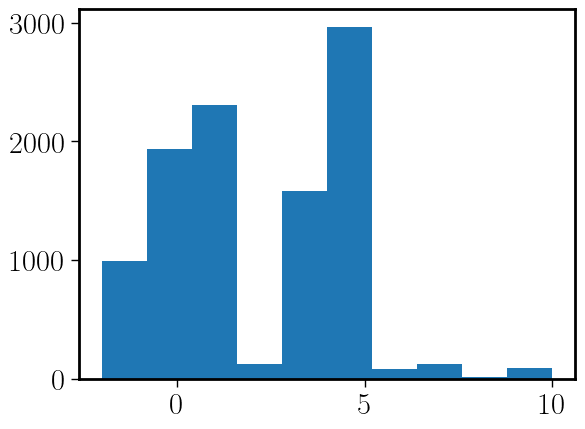

In [20]:
plt.hist(tab_MaNGA['best_type_n'])

In [21]:
get_X_AGNs="tables/Xray_AGNs.csv"
col_X_AGNs=header_columns_header(get_X_AGNs, column=2)
tab_X_AGNs=ascii.read(get_X_AGNs, delimiter=',', guess=True, comment='\s*#', names=col_X_AGNs,\
                      fill_values=[('BAD', np.nan)])


#tab_QC_v23.rename_column('Name','cubename')

In [22]:
get_outflows="tables/outflows.csv"
col_outflows=header_columns_header(get_outflows, column=2)
tab_outflows=ascii.read(get_outflows, delimiter=',', guess=True, comment='\s*#', names=col_outflows,\
                      fill_values=[('BAD', np.nan)])


In [23]:
get_Re="tables/get_val_Re_CALIFA_v2.3.csv"
col_Re=header_columns_space(get_Re, column=2)
tab_Re=ascii.read(get_Re, delimiter=',', guess=True, comment='\s*#', names=col_Re,\
                      fill_values=[('BAD', np.nan),('',np.nan)])
tab_Re.rename_column('MaNGA_name','cubename')
list_columns(tab_Re.colnames)


cubename                e_Age_LW                e_disp_Ha               e_ML                    
Sigma_Mass_stars        Age_MW                  vel_Ha                  Sigma_SFR_ssp           
e_Sigma_Mass_stars      e_Age_MW                e_vel_Ha                e_Sigma_SFR_ssp         
Sigma_SFR               OH_t2                   vel_ssp                 Sigma_Mass_gas_rad      
e_Sigma_SFR             e_OH_t2                 e_vel_ssp               e_Sigma_Mass_gas_rad    
Sigma_Mass_gas          OH_O3N2                 SK_ssp                  Lambda                  
e_Sigma_Mass_gas        e_OH_O3N2               e_SK_ssp                e_Lambda                
Sigma_Mass_gas_ssp      Av_gas                  SK_Ha                   OH_ONS                  
e_Sigma_Mass_gas_ssp    e_Av_gas                e_SK_Ha                 e_OH_ONS                
ZH_LW                   Av_ssp                  KIN_ssp                 NO_ONS                  
e_ZH_LW                 e_Av_s

In [24]:
get_pe="tables/get_proc_elines_CALIFA_v2.3.clean.csv"
col_pe=header_columns_space(get_pe, column=2)
tab_pe=ascii.read(get_pe, delimiter=',', guess=True, comment='\s*#', names=col_pe,\
                      fill_values=[('BAD', np.nan),('',np.nan)])
tab_pe.rename_column('name','cubename')
tab_pe['ZH_LW_Re_fit']=tab_pe['ZH_LW_Re']      
list_columns(tab_pe.colnames)

cubename                            NH_Re_log                           e_NO_Re_fit_EPM09                   T60                                 
log_Mass_no_corr                    NO_Re_log                           alpha_NO_Re_fit_EPM09               ZH_T60                              
lSFR                                sigma_cen_Ha                        e_alpha_NO_Re_fit_EPM09             ZH_Re_T60                           
OH_O3N2                             e_sigma_cen_Ha                      cc_r_NO_EPM09                       a_ZH_T60                            
e_OH_O3N2                           rat_vel_sigma                       sig_r_NO_EPM09                      T70                                 
a_ion_cen[3]                        e_rat_vel_sigma                     NO_Re_fit_N2S2                      ZH_T70                              
frac_area_GAS                       OH_Re_fit_pyqz                      e_NO_Re_fit_N2S2                    ZH_Re_T70             

In [25]:
#hdu=fits.open('tables/CAL_HIIreg.fits.gz')
#tab_HII=Table(hdu[1].data)

In [26]:
#list_columns(tab_HII.columns)

In [27]:
#plt.hist(tab_HII['dist'])

In [28]:
hdu=fits.open('out_tables/galaxies_properties.fits.gz')
tab=Table(hdu[1].data)

X_AGNs=[]
for name in tab['cubename']:
    itemindex = np.where(tab_X_AGNs['name'] == name)
    X_AGNs.append(len(itemindex[0]))
X_AGNs=np.array(X_AGNs)
tab.add_column(X_AGNs,name='X_AGNs')

outflows=[]
for name in tab['cubename']:
    itemindex = np.where(tab_outflows['name'] == name)
    outflows.append(len(itemindex[0]))
outflows=np.array(outflows)
tab.add_column(outflows,name='outflows')


#list_columns(tab.columns)

(array([ 37.,  94., 134., 136., 116.,  94.,  70.,  42.,  28., 144.]),
 array([  1.71172813,  13.19304057,  24.674353  ,  36.15566544,
         47.63697787,  59.11829031,  70.59960274,  82.08091518,
         93.56222761, 105.04354005, 116.52485248]),
 <BarContainer object of 10 artists>)

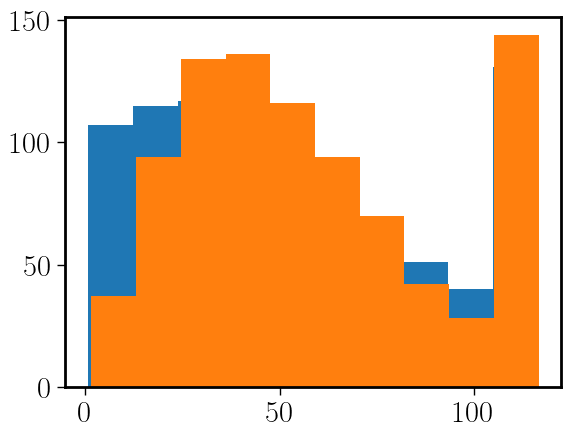

In [29]:
plt.hist(tab['disp_vel_elines_cen'])
plt.hist(tab['disp_vel_elines_int'])


In [30]:
tab=join(tab,tab_pe,keys=['cubename'],join_type='left')
tab=join(tab,tab_Re,keys=['cubename'],join_type='left')


In [31]:
n=len(tab)
tab['disp_vel_elines_cen']=tab['disp_vel_elines_cen']+5*np.random.rand(n)+0.1*tab['disp_vel_elines_cen']*np.random.rand(n)
tab['disp_vel_elines_int']=tab['disp_vel_elines_int']+5*np.random.rand(n)+0.1*tab['disp_vel_elines_int']*np.random.rand(n)
tab['disp_vel_elines_out']=np.abs(tab['disp_vel_elines_int']-0.2*tab['disp_vel_elines_cen'])/0.8+2.5*np.random.rand(n)


#list_columns(tab.columns)

In [32]:
cont_Ha_cen=tab['F_6563_cen']/10**(tab['WHa_cen'])
cont_Ha_int=tab['F_6563_int']/10**(tab['WHa_int'])
cont_Ha_out=cont_Ha_int-cont_Ha_cen
WHa_out=np.log10(np.abs((tab['F_6563_int']-tab['F_6563_cen'])/cont_Ha_out))
tab.add_column(WHa_out,name='WHa_out')


In [33]:
O3_cen = np.log10(tab['F_5007_cen']/tab['F_4861_cen'])
e_O3_cen = 0.4*tab['e_F_5007_cen']/tab['F_4861_cen']
O3_int = np.log10(tab['F_5007_int']/tab['F_4861_int'])
e_O3_int = 0.4*tab['e_F_5007_int']/tab['F_4861_int']
O3_out = np.log10((tab['F_5007_int']-tab['F_5007_cen'])/(tab['F_4861_int']-tab['F_4861_cen']))
e_O3_out = 0.4*(tab['e_F_5007_int']+tab['e_F_5007_cen'])/(tab['F_4861_int']-tab['F_4861_cen'])

N2_cen = np.log10(tab['F_6583_cen']/tab['F_6563_cen'])
e_N2_cen = 0.4*tab['e_F_6583_cen']/tab['F_6563_cen']
N2_int = np.log10(tab['F_6583_int']/tab['F_6563_int'])
e_N2_int = 0.4*tab['e_F_6583_int']/tab['F_6563_int']
N2_out = np.log10((tab['F_6583_int']-tab['F_6563_cen'])/(tab['F_6563_int']-tab['F_6563_cen']))
e_N2_out = 0.4*(tab['e_F_6583_int']+tab['e_F_6583_cen'])/(tab['F_6563_int']-tab['F_6563_cen'])


tab.add_column(O3_cen,name='O3_cen')
tab.add_column(e_O3_cen,name='e_O3_cen')
tab.add_column(O3_int,name='O3_int')
tab.add_column(e_O3_int,name='e_O3_int')
tab.add_column(O3_int,name='O3_out')
tab.add_column(e_O3_int,name='e_O3_out')
tab.add_column(N2_cen,name='N2_cen')
tab.add_column(e_N2_cen,name='e_N2_cen')
tab.add_column(N2_int,name='N2_int')
tab.add_column(e_N2_int,name='e_N2_int')
tab.add_column(N2_int,name='N2_out')
tab.add_column(e_N2_int,name='e_N2_out')
tab.add_column(np.log10(tab['disp_vel_elines_cen']),name='lde_cen')
tab.add_column(np.log10(tab['disp_vel_elines_int']),name='lde_int')
tab.add_column(np.log10(tab['disp_vel_elines_out']),name='lde_out')


list_columns(tab.columns)


ID                                  alpha_ZH_LW_lRe_fit                 alpha_NO_Re_fit_ONS                 vel_Ha_2                            
cubename                            e_alpha_ZH_LW_lRe_fit               e_alpha_NO_Re_fit_ONS               e_vel_Ha_2                          
galaxy                              ZH_MW_Re_fit                        cc_r_NO_ONS                         vel_ssp_1                           
RA                                  e_ZH_MW_Re_fit                      sig_r_NO_ONS                        e_vel_ssp_1                         
DEC                                 alpha_ZH_MW_Re_fit                  OH_Re_fit_dop                       vel_Ha_1                            
z                                   e_alpha_ZH_MW_Re_fit                e_OH_Re_fit_dop                     e_vel_Ha_1                          
type                                Age_LW_Re_fit                       alpha_OH_Re_fit_dop                 log_SFR_ssp_100Myr    

In [34]:
O3_Kew=0.61/(N2_cen-0.47)+1.19
O3_Kau=0.61/(N2_cen-0.05)+1.3

# O3 = a/(N2-b)+c

Opt_AGNs=[]
for (O3_Kau_now,O3_Kew_now,O3_cen_now,N2_cen_now,WHa_cen_now) in zip(O3_Kau,O3_Kew,O3_cen,N2_cen,tab['WHa_cen']):
    AGN_now=0
    if (WHa_cen_now>0.78):  #Strong Opt. AGNs
        if (N2_cen_now>0.2):
            AGN_now=1
        else:
            if (O3_cen_now>O3_Kew_now):
                AGN_now=1
    Opt_AGNs.append(AGN_now)
Opt_AGNs=np.array(Opt_AGNs)
tab.add_column(Opt_AGNs,name='Opt_AGNs')



In [35]:
mask_SF = (tab['type']=='Sc') | (tab['type']=='Sd') | (tab['type']=='Scd') #| (tab['type']=='Sbc') 
mask_RG = (tab['type']=='E') | (tab['type']=='S0') #| (tab['type']=='Scd') | (tab['type']=='Sbc')
mask_ES = ((tab['type']=='Sa') | (tab['type']=='Sab') | (tab['type']=='Sb')) & (tab['log_Mass']>11) 
#mask_SF = ~ mask_RG
cut_Kew_int=0.61/(N2_int-0.47)+1.19
cut_Kew_cen=0.61/(N2_cen-0.47)+1.19
cut_Kew_out=0.61/(N2_out-0.47)+1.19

#cut_Kau=0.61/(x-0.05)+1.3

cut_Kau_int=0.61/(N2_int-0.05)+1.3
cut_Kau_cen=0.61/(N2_cen-0.05)+1.3
cut_Kau_out=0.61/(N2_out-0.05)+1.3

mask_SF = mask_SF & (tab['X_AGNs']==0) & (tab['outflows']==0) 
mask_RG = mask_RG & (tab['X_AGNs']==0) & (tab['outflows']==0)
mask_RG = mask_RG & (tab['outflows']==0)

mask_X_AGNs = (tab['X_AGNs']==1) & (tab['outflows']==0)
mask_outflows = (tab['X_AGNs']==0) & (tab['outflows']==1)
mask_Opt_AGNs = (tab['Opt_AGNs']==1) & (tab['outflows']==0)

print(len(tab[mask_SF]))
print(len(tab[mask_ES]))
print(len(tab[mask_RG]))
print(len(tab[mask_X_AGNs]))
print(len(tab[mask_Opt_AGNs]))
print(len(tab[mask_outflows]))

# (tab['type']=='Sc') | 
#print(tab['type'][mask_SF])

183
30
54
30
134
15


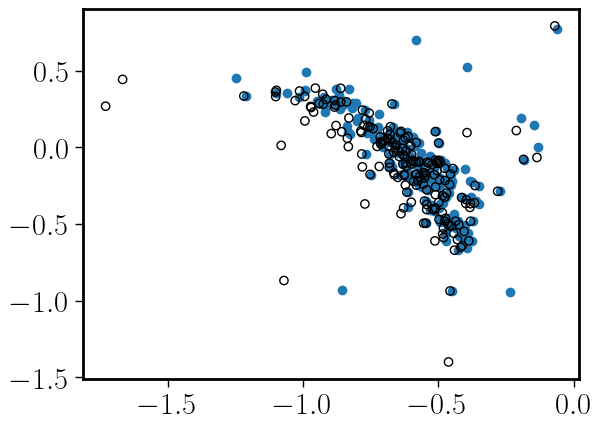

In [36]:
plt.scatter(N2_int[mask_SF],O3_int[mask_SF])
plt.scatter(N2_out[mask_SF],O3_out[mask_SF],color='none', edgecolor='black')


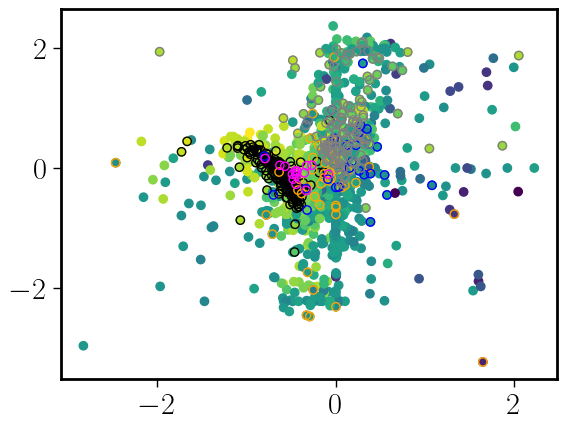

In [37]:
plt.scatter(N2_cen,O3_cen,c=tab['WHa_cen'])
plt.scatter(N2_int,O3_int,c=tab['WHa_int'])
plt.scatter(N2_out,O3_out,c=tab['WHa_out'])
plt.scatter(N2_out[mask_SF],O3_out[mask_SF],color='none', edgecolor='black')
plt.scatter(N2_out[mask_RG],O3_out[mask_RG],color='none', edgecolor='orange')
plt.scatter(N2_cen[mask_X_AGNs],O3_cen[mask_X_AGNs],color='none', edgecolor='blue')
#plt.scatter(N2_out[mask_outflows],O3_out[mask_outflows],color='none', edgecolor='magenta')
#plt.scatter(N2_cen[mask_outflows],O3_cen[mask_outflows],color='none', edgecolor='magenta')
plt.scatter(N2_int[mask_outflows],O3_int[mask_outflows],color='none', edgecolor='magenta')
plt.scatter(N2_cen[mask_Opt_AGNs],O3_cen[mask_Opt_AGNs],color='none', edgecolor='grey')
#plt.scatter(N2_cen[mask_RG],O3_cen[mask_RG],color='none', edgecolor='orange')
#plt.scatter(N2_cen[mask_SF],O3_cen[mask_SF],color='none', edgecolor='black')

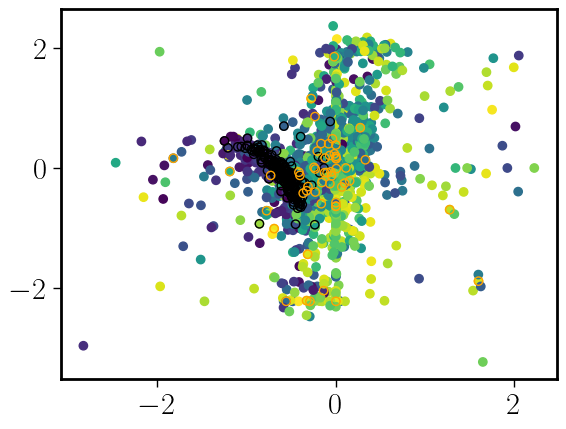

In [38]:
plt.scatter(N2_cen,O3_cen,c=tab['disp_vel_elines_cen'])
plt.scatter(N2_int,O3_int,c=tab['disp_vel_elines_int'])
plt.scatter(N2_out,O3_out,c=tab['disp_vel_elines_out'])
plt.scatter(N2_int[mask_SF],O3_int[mask_SF],color='none', edgecolor='black')
plt.scatter(N2_int[mask_RG],O3_int[mask_RG],color='none', edgecolor='orange')
#plt.scatter(N2_int[mask_RG],O3_int[mask_RG],color='none', edgecolor='orange')
#plt.scatter(N2_cen[mask_RG],O3_cen[mask_RG],color='none', edgecolor='orange')
#plt.scatter(N2_cen[mask_SF],O3_cen[mask_SF],color='none', edgecolor='black')

(array([314., 291., 164.,  39.,  47.,  16.,   8.,   6.,   6.,   4.]),
 array([  0.        ,  50.84475137, 101.68950275, 152.53425412,
        203.3790055 , 254.22375687, 305.06850825, 355.91325962,
        406.758011  , 457.60276237, 508.44751375]),
 <BarContainer object of 10 artists>)

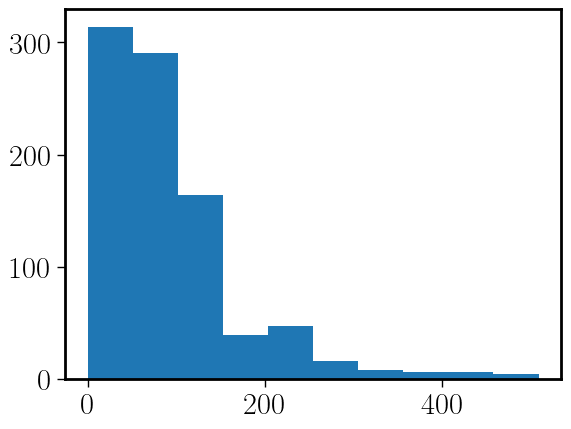

In [39]:
#plt.hist(tab['disp_vel_elines_cen'])
#plt.hist(tab['disp_vel_elines_int'])
plt.hist(tab['sigma_cen_Ha'])
#plt.hist(tab['sigma_Re_Ha'])



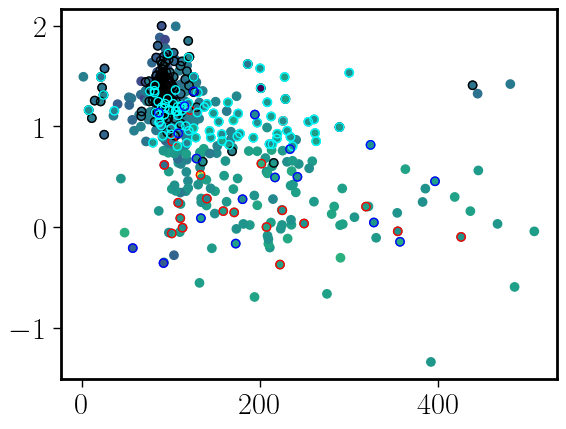

In [40]:
#plt.scatter(tab['disp_vel_elines_cen'],tab['WHa_cen'],c=tab['N2_cen'])
mask_c = (tab['sigma_cen_Ha']>0)
mask_SF_c = mask_SF & (tab['sigma_cen_Ha']>0)
mask_RG_c = mask_RG & (tab['sigma_cen_Ha']>0)
mask_X_AGNs_c = mask_X_AGNs & (tab['sigma_cen_Ha']>0)
mask_Opt_AGNs_c = mask_Opt_AGNs & (tab['sigma_cen_Ha']>0)
mask_outflows_c = mask_outflows & (tab['sigma_cen_Ha']>0)
plt.scatter(tab['sigma_cen_Ha'][mask_c],tab['WHa_cen'][mask_c],c=tab['N2_cen'][mask_c])
plt.scatter(tab['sigma_cen_Ha'][mask_SF_c],tab['WHa_cen'][mask_SF_c],color='none', edgecolor='black')
plt.scatter(tab['sigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],color='none', edgecolor='red')
plt.scatter(tab['sigma_cen_Ha'][mask_Opt_AGNs_c],tab['WHa_cen'][mask_Opt_AGNs_c],color='none', edgecolor='cyan')
plt.scatter(tab['sigma_cen_Ha'][mask_X_AGNs_c],tab['WHa_cen'][mask_X_AGNs_c],color='none', edgecolor='blue')



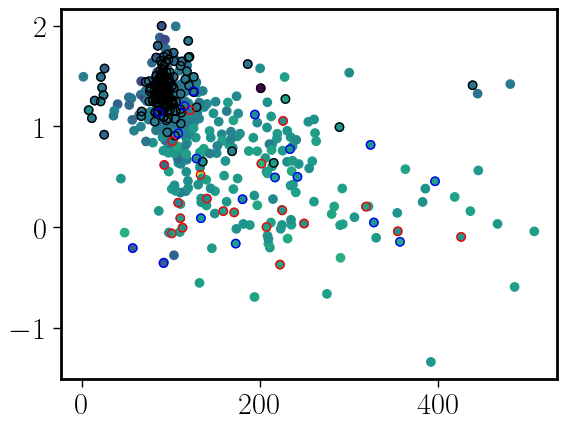

In [41]:
plt.scatter(tab['sigma_cen_Ha'][mask_c],tab['WHa_cen'][mask_c],c=tab['N2_cen'][mask_c])
plt.scatter(tab['sigma_cen_Ha'][mask_SF_c],tab['WHa_cen'][mask_SF_c],color='none', edgecolor='black')
plt.scatter(tab['sigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],color='none', edgecolor='red')
plt.scatter(tab['sigma_cen_Ha'][mask_X_AGNs_c],tab['WHa_cen'][mask_X_AGNs_c],color='none', edgecolor='blue')
#plt.scatter(tab['sigma_cen_Ha'][mask_outflows_c],tab['WHa_cen'][mask_outflows_c],color='none', 

In [42]:
#tab.add_column(np.log10(tab['sigma_cen_Ha']/1.75),name='lsigma_cen_Ha')
#tab.add_column(np.log10(tab['disp_Ha']/1.75),name='lsigma_Re_Ha')


In [43]:
#tab.add_column(np.log10(np.sqrt(tab['sigma_cen_Ha']**2-6.5**2)/2),name='lsigma_cen_Ha')
#tab.add_column(np.log10(np.sqrt(tab['disp_Ha']**2-6.5**2)/2),name='lsigma_Re_Ha')
try: 
    tab.remove_column('lsigma_cen_Ha')
except:
    print('Not needed')
try: 
    tab.remove_column('lsigma_Re_Ha')
except:
    print('Not needed')
    
mask_now = tab['sigma_cen_Ha']<tab['disp_Ha']
tab['disp_Ha'][mask_now]=tab['sigma_cen_Ha'][mask_now]    
    
#tab.add_column(np.log10(tab['sigma_cen_Ha']/2.2345),name='lsigma_cen_Ha')
tab.add_column(np.log10(tab['sigma_cen_Ha']/2.2345*1.4),name='lsigma_cen_Ha')
tab.add_column(np.log10(tab['disp_Ha']/2.345),name='lsigma_Re_Ha')


Not needed
Not needed


(-0.5, 2.1)

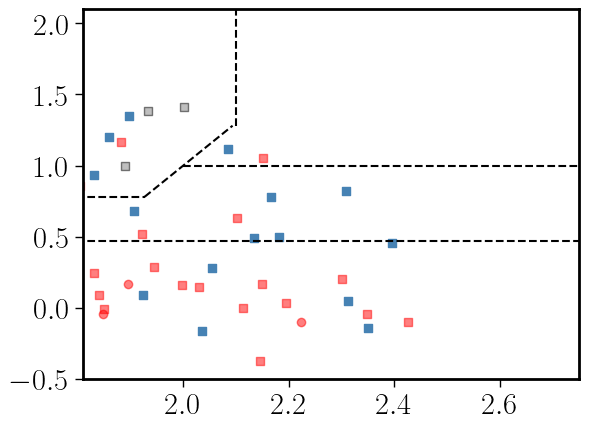

In [44]:
#plt.scatter(tab['lsigma_cen_Ha'][mask_c],tab['WHa_cen'][mask_c],c=tab['N2_cen'][mask_c])
#plt.scatter(tab['lsigma_Re_Ha'][mask_c],tab['WHa_int'][mask_c],c=tab['N2_int'][mask_c])

#plt.scatter(tab['lsigma_Re_Ha'][mask_SF_c],tab['WHa_int'][mask_SF_c],c=tab['N2_int'][mask_SF_c])
plt.scatter(tab['lsigma_Re_Ha'][mask_SF_c],tab['WHa_out'][mask_SF_c],marker='s',color='grey', edgecolor='black',alpha=0.5)
#plt.scatter(tab['lsigma_cen_Ha'][mask_SF_c],tab['WHa_cen'][mask_SF_c],marker='o',color='grey', edgecolor='grey',alpha=0.5)

#plt.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],c=tab['N2_int'][mask_RG_c])

plt.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],marker='s',color='red', edgecolor='red',alpha=0.5)
plt.scatter(tab['lsigma_Re_Ha'][mask_RG_c],tab['WHa_out'][mask_RG_c],marker='o',color='red', edgecolor='red',alpha=0.5)

#plt.scatter(tab['lsigma_cen_Ha'][mask_Opt_AGNs_c],tab['WHa_cen'][mask_Opt_AGNs_c],color='none', edgecolor='cyan')
#plt.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],c=tab['N2_int'][mask_RG_c])
plt.scatter(tab['lsigma_cen_Ha'][mask_X_AGNs_c],tab['WHa_cen'][mask_X_AGNs_c],marker='s',color='steelblue', edgecolor='steelblue')
#plt.scatter(tab['lsigma_Re_Ha'][mask_outflows_c],tab['WHa_out'][mask_outflows_c],color='none', edgecolor='orange')
lEW_cut=np.arange(0.78,1.3,0.5)
lsigma_cut=(lEW_cut+5)/3
#lsigma_cut=np.arange(1.75,2.3,0.1)
#lEW_cut =-5+3*lsigma_cut
plt.plot(lsigma_cut,lEW_cut,'--',c='black')
plt.plot([1.5,lsigma_cut[0]],[0.78,0.78],'--',c='black')
plt.plot([2.1,2.1],[lEW_cut[-1],2.2],'--',c='black')
plt.plot([1.5,2.75],[0.47,0.47],'--',c='black')
plt.plot([2,2.75],[1.0,1.0],'--',c='black')

plt.xlim(1.81,2.75)
plt.ylim(-0.5,2.1)


(-1.5, 1.3)

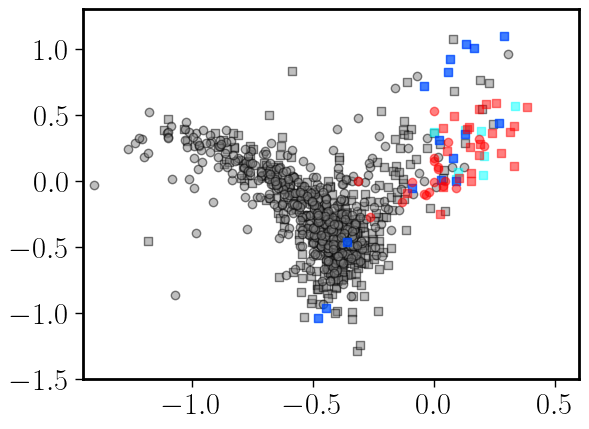

In [45]:
mask_SN = (tab['e_O3_cen']<0.15)&(tab['e_N2_cen']<0.15)&(tab['sigma_cen_Ha']>0)
#plt.scatter(N2_cen[mask_SN],O3_cen[mask_SN],c=tab['disp_vel_elines_cen'][mask_SN],cmap='Greys_r')
#mask_d_SF =  (tab['lsigma_cen_Ha']<2.1)&(tab['WHa_cen']>0.78)&(tab['e_O3_cen']<0.1)&(tab['e_N2_cen']<0.1)&(tab['sigma_cen_Ha']>0)
mask_d_SF =  (tab['lsigma_Re_Ha']<2.0)&(tab['WHa_out']>0.78)&(tab['e_O3_out']<0.15)&(tab['e_N2_out']<0.15)&(tab['disp_Ha']>0)&(tab['lsigma_Re_Ha']<((tab['WHa_out']+5)/3))
mask_d_SF_cen =  (tab['lsigma_cen_Ha']<2.0)&(tab['WHa_cen']>0.78)&(tab['e_O3_cen']<0.15)&(tab['e_N2_cen']<0.15)&(tab['sigma_cen_Ha']>0)&(tab['lsigma_cen_Ha']<((tab['WHa_cen']+5)/3))

mask_d_RG = (tab['lsigma_cen_Ha']>2.1)&(tab['WHa_cen']<0.47)&(tab['e_O3_cen']<0.15)&(tab['e_N2_cen']<0.15)&(tab['sigma_cen_Ha']>0)
mask_d_AGN = (tab['lsigma_cen_Ha']>2.1)&(tab['WHa_cen']>0.47)&(tab['e_O3_cen']<0.15)&(tab['e_N2_cen']<0.15)&(tab['sigma_cen_Ha']>0)
mask_d_sAGN = (tab['lsigma_cen_Ha']>2.1)&(tab['WHa_cen']>0.78)&(tab['e_O3_cen']<0.15)&(tab['e_N2_cen']<0.15)&(tab['sigma_cen_Ha']>0)

mask_U = ~((mask_d_SF)&(mask_d_RG)&(mask_d_AGN))

#plt.scatter(N2_int,O3_int,c=tab['disp_vel_elines_int'])
#plt.scatter(N2_out,O3_out,c=tab['disp_vel_elines_out'])
#plt.scatter(N2_cen[mask_d_SF],O3_cen[mask_d_SF],color='none', edgecolor='green')
#plt.scatter(N2_out[mask_U],O3_out[mask_U],marker='+',color='black', edgecolor='black',alpha=0.5)

plt.scatter(N2_cen[mask_d_SF_cen],O3_cen[mask_d_SF_cen],marker='s',color='grey', edgecolor='black',alpha=0.5)
plt.scatter(N2_out[mask_d_SF],O3_out[mask_d_SF],marker='o',color='grey', edgecolor='black',alpha=0.5)
#plt.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],color='none', edgecolor='red')
plt.scatter(N2_cen[mask_d_AGN],O3_cen[mask_d_AGN],marker='s',color='cyan', edgecolor='cyan',alpha=0.5)
plt.scatter(N2_cen[mask_d_sAGN],O3_cen[mask_d_sAGN],marker='s',color='blue', edgecolor='blue',alpha=0.5)
plt.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],marker='s',color='red', edgecolor='red',alpha=0.5)
plt.scatter(N2_out[mask_d_RG],O3_out[mask_d_RG],marker='o',color='red', edgecolor='red',alpha=0.5)

#plt.scatter(N2_cen[mask_RG],O3_cen[mask_RG],color='none', edgecolor='orange')
plt.xlim(-1.45,0.6)
plt.ylim(-1.5,1.3)

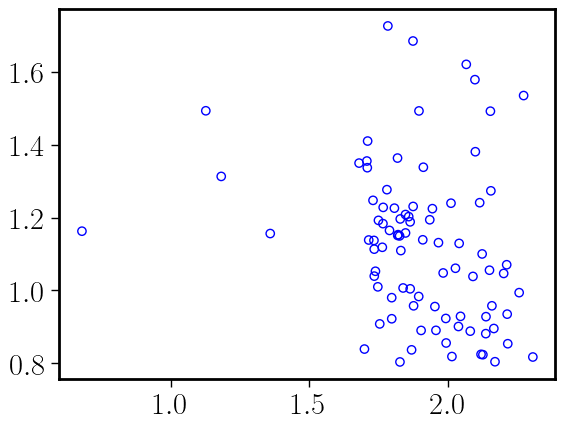

In [46]:
plt.scatter(tab['lsigma_cen_Ha'][mask_Opt_AGNs_c],tab['WHa_cen'][mask_Opt_AGNs_c],color='none', edgecolor='blue')

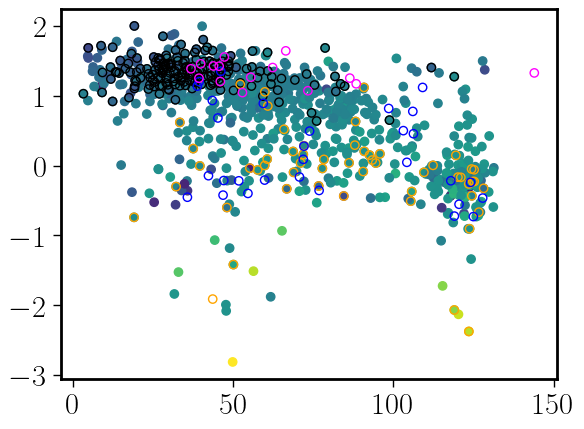

In [47]:
#plt.scatter(tab['disp_vel_elines_cen'],tab['WHa_cen'],c=tab['N2_cen'])
plt.scatter(tab['disp_vel_elines_int'],tab['WHa_int'],c=tab['N2_int'])
#plt.scatter(tab['disp_vel_elines_out'],tab['WHa_out'],c=tab['N2_out'])
#plt.scatter(tab['disp_vel_elines_cen'],tab['WHa_cen'],color='none',edgecolor='orange',alpha=0.5)
plt.scatter(tab['disp_vel_elines_int'][mask_SF],tab['WHa_int'][mask_SF],color='none', edgecolor='black')
plt.scatter(tab['disp_vel_elines_int'][mask_RG],tab['WHa_int'][mask_RG],color='none', edgecolor='orange')
plt.scatter(tab['disp_vel_elines_cen'][mask_X_AGNs],tab['WHa_cen'][mask_X_AGNs],color='none', edgecolor='blue')
plt.scatter(tab['disp_vel_elines_out'][mask_outflows],tab['WHa_out'][mask_outflows],color='none', edgecolor='magenta')



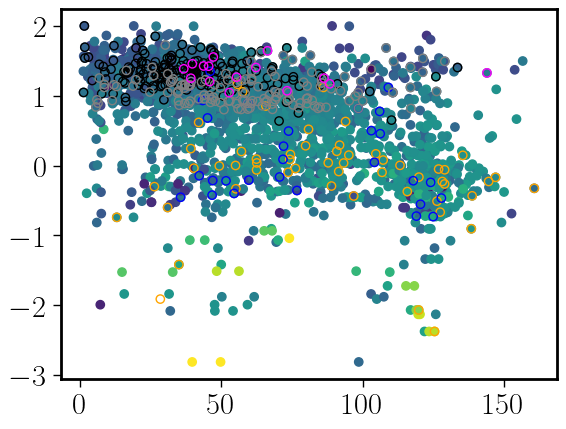

In [48]:
plt.scatter(tab['disp_vel_elines_cen'],tab['WHa_cen'],c=tab['N2_cen'])
plt.scatter(tab['disp_vel_elines_int'],tab['WHa_int'],c=tab['N2_int'])
plt.scatter(tab['disp_vel_elines_out'],tab['WHa_out'],c=tab['N2_out'])
#plt.scatter(tab['disp_vel_elines_cen'],tab['WHa_cen'],color='none',edgecolor='orange',alpha=0.5)
plt.scatter(tab['disp_vel_elines_out'][mask_SF],tab['WHa_out'][mask_SF],color='none', edgecolor='black')
plt.scatter(tab['disp_vel_elines_out'][mask_RG],tab['WHa_out'][mask_RG],color='none', edgecolor='orange')
plt.scatter(tab['disp_vel_elines_cen'][mask_X_AGNs],tab['WHa_cen'][mask_X_AGNs],color='none', edgecolor='blue')
plt.scatter(tab['disp_vel_elines_cen'][mask_Opt_AGNs],tab['WHa_cen'][mask_Opt_AGNs],color='none', edgecolor='grey')
plt.scatter(tab['disp_vel_elines_out'][mask_outflows],tab['WHa_out'][mask_outflows],color='none', edgecolor='magenta')


#plt.scatter(N2_int[mask_SF],O3_int[mask_SF],color='none', edgecolor='black')

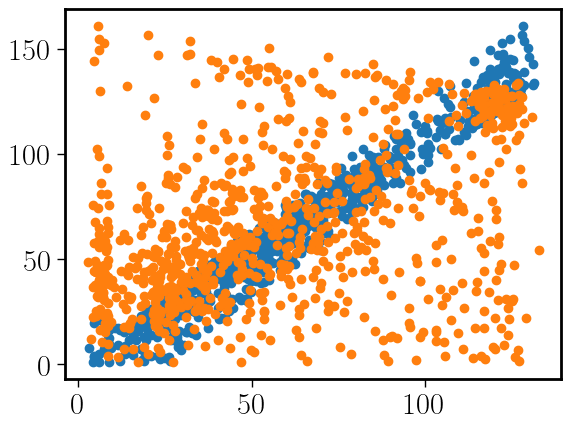

In [49]:
plt.scatter(tab['disp_vel_elines_int'],tab['disp_vel_elines_out'])
plt.scatter(tab['disp_vel_elines_cen'],tab['disp_vel_elines_out'])


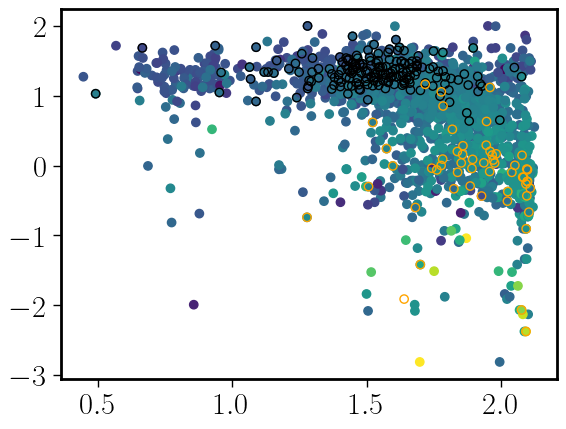

In [50]:
plt.scatter(tab['lde_cen'],tab['WHa_cen'],c=tab['N2_cen'])
plt.scatter(tab['lde_int'],tab['WHa_int'],c=tab['N2_int'])
plt.scatter(tab['lde_int'][mask_SF],tab['WHa_int'][mask_SF],color='none', edgecolor='black')
plt.scatter(tab['lde_int'][mask_RG],tab['WHa_int'][mask_RG],color='none', edgecolor='orange')




(-1.2, 2.0)

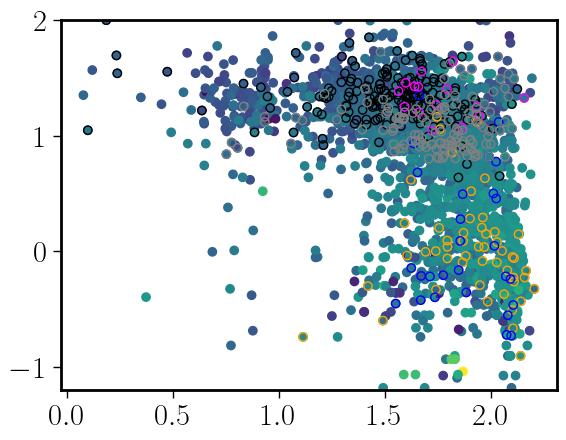

In [51]:
plt.scatter(tab['lde_cen'],tab['WHa_cen'],c=tab['N2_cen'])
plt.scatter(tab['lde_int'],tab['WHa_int'],c=tab['N2_int'])
plt.scatter(tab['lde_out'],tab['WHa_out'],c=tab['N2_out'])
plt.scatter(tab['lde_out'][mask_SF],tab['WHa_out'][mask_SF],color='none', edgecolor='black')
plt.scatter(tab['lde_out'][mask_RG],tab['WHa_out'][mask_RG],color='none', edgecolor='orange')
plt.scatter(tab['lde_cen'][mask_X_AGNs],tab['WHa_cen'][mask_X_AGNs],color='none', edgecolor='blue')
plt.scatter(tab['lde_out'][mask_outflows],tab['WHa_out'][mask_outflows],color='none', edgecolor='magenta')
plt.scatter(tab['lde_cen'][mask_Opt_AGNs],tab['WHa_cen'][mask_Opt_AGNs],color='none', edgecolor='grey')

plt.ylim(-1.2,2)


(-2.0, 1.5)

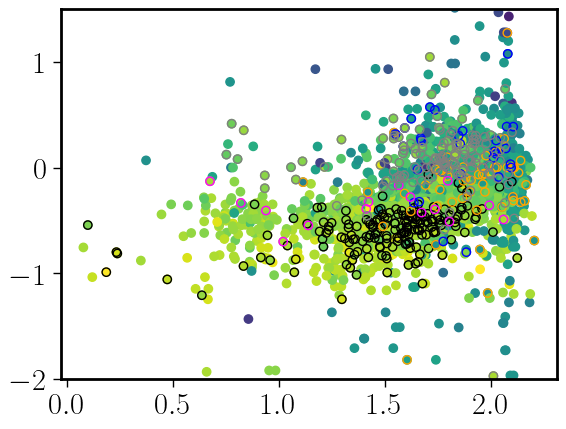

In [52]:
plt.scatter(tab['lde_cen'],tab['N2_cen'],c=tab['WHa_cen'])
plt.scatter(tab['lde_int'],tab['N2_int'],c=tab['WHa_int'])
plt.scatter(tab['lde_out'],tab['N2_out'],c=tab['WHa_out'])
plt.scatter(tab['lde_out'][mask_SF],tab['N2_out'][mask_SF],color='none', edgecolor='black')
plt.scatter(tab['lde_out'][mask_RG],tab['N2_out'][mask_RG],color='none', edgecolor='orange')
plt.scatter(tab['lde_cen'][mask_X_AGNs],tab['N2_cen'][mask_X_AGNs],color='none', edgecolor='blue')
plt.scatter(tab['lde_cen'][mask_outflows],tab['N2_cen'][mask_outflows],color='none', edgecolor='magenta')
plt.scatter(tab['lde_cen'][mask_Opt_AGNs],tab['N2_cen'][mask_Opt_AGNs],color='none', edgecolor='grey')
plt.ylim(-2,1.5)


(-1.2, 2.0)

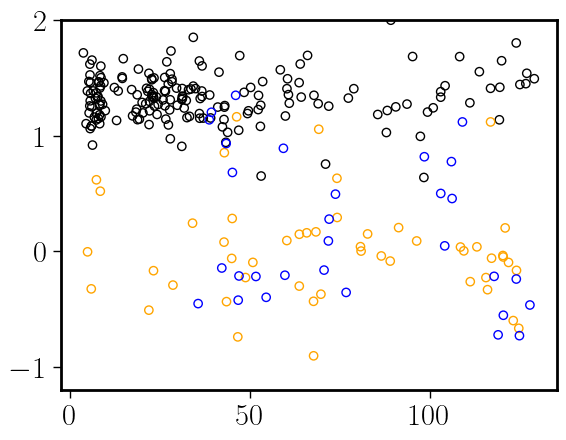

In [53]:
#plt.scatter(tab['disp_vel_elines_cen'],tab['WHa_cen'],c=tab['N2_cen'])
#plt.scatter(tab['disp_vel_elines_int'],tab['WHa_int'],c=tab['N2_int'])
#plt.scatter(tab['disp_vel_elines_out'],tab['WHa_out'],c=tab['N2_out'])
#plt.scatter(tab['disp_vel_elines_cen'],tab['WHa_cen'],color='none',edgecolor='orange',alpha=0.5)
plt.scatter(tab['disp_vel_elines_cen'][mask_SF],tab['WHa_cen'][mask_SF],color='none', edgecolor='black')
plt.scatter(tab['disp_vel_elines_cen'][mask_RG],tab['WHa_cen'][mask_RG],color='none', edgecolor='orange')
plt.scatter(tab['disp_vel_elines_cen'][mask_X_AGNs],tab['WHa_cen'][mask_X_AGNs],color='none', edgecolor='blue')
#plt.scatter(tab['disp_vel_elines_cen'][mask_Opt_AGNs],tab['WHa_cen'][mask_Opt_AGNs],color='none', edgecolor='red')
#plt.scatter(tab['disp_vel_elines_cen'][mask_outflows],tab['WHa_cen'][mask_outflows],color='none', edgecolor='magenta')
plt.ylim(-1.2,2)

#plt.scatter(N2_int[mask_SF],O3_int[mask_SF],color='none', edgecolor='black')

In [54]:
#plt.hist(tab_MaNGA['lsigma_Re_Ha'])

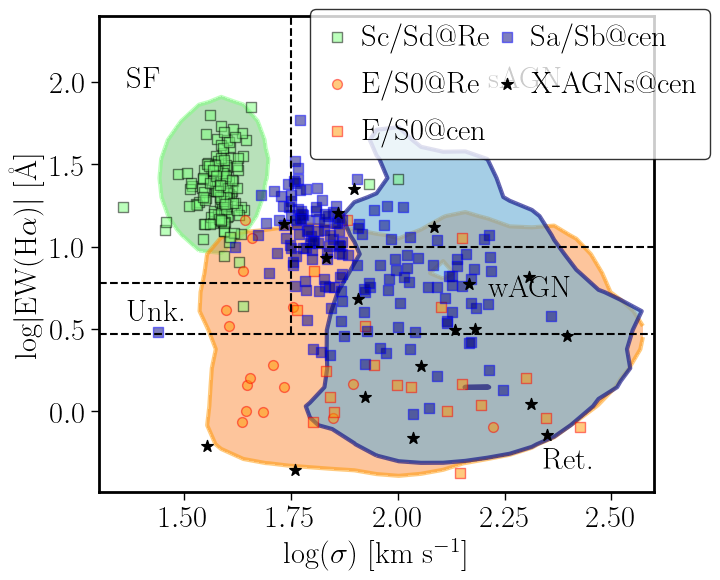

In [55]:
#
# CALIFA
#
mask_SF = (tab['type']=='Sc') | (tab['type']=='Sd') | (tab['type']=='Scd') #| (tab['type']=='Sbc') 
mask_SF = mask_SF & (tab['log_Mass']<10.75) # & (np.abs(tab['EW_Ha_Re'])>3) #& (np.abs(tab['EW_Ha_Re'])<10)
mask_ES = (tab['type']=='Sa') | (tab['type']=='Sab') | (tab['type']=='Sb') #| (tab['type']=='Sbc') 
#mask_ES = mask_ES & (tab['log_Mass']>10.75) #& (np.abs(tab['EW_Ha_Re'])>3)& (np.abs(tab['EW_Ha_Re'])>10)
cut_Kew_int=0.61/(N2_int-0.47)+1.19
cut_Kew_cen=0.61/(N2_cen-0.47)+1.19
cut_Kew_out=0.61/(N2_out-0.47)+1.19


mask_RG = (tab['type']=='E') | (tab['type']=='S0') #| (tab['type']=='Scd') | (tab['type']=='Sbc')
mask_SF = mask_SF & (tab['X_AGNs']==0) & (tab['outflows']==0) & (O3_out<cut_Kew_out)
mask_ES = mask_ES & (tab['X_AGNs']==0) & (tab['outflows']==0)
mask_RG = mask_RG & (tab['X_AGNs']==0) & (tab['outflows']==0)
mask_X_AGNs = (tab['X_AGNs']==1) & (tab['outflows']==0)
mask_outflows = (tab['X_AGNs']==0) & (tab['outflows']==1)
mask_Opt_AGNs = (tab['Opt_AGNs']==1) & (tab['outflows']==0)
mask_c = (tab['sigma_cen_Ha']>0)
mask_SF_c = mask_SF & (tab['sigma_cen_Ha']>0)
mask_ES_c = mask_ES & (tab['sigma_cen_Ha']>0)
mask_RG_c = mask_RG & (tab['sigma_cen_Ha']>0)
mask_X_AGNs_c = mask_X_AGNs & (tab['sigma_cen_Ha']>0)
mask_Opt_AGNs_c = mask_Opt_AGNs & (tab['sigma_cen_Ha']>0) #& mask_ES
mask_outflows_c = mask_outflows & (tab['sigma_cen_Ha']>0)

#
# MaNGA
#
#{-2: 'CD', -1: 'E', 0: 'S0', 1: 'Sa', 2: 'Sab', 3: 'Sb', 4: 'Sbc', 5: 'Sc', 6: 'Scd', 7: 'Sd', 8: 'Sdm', 9: 'Sm', 10: 'Irr'}
# 
mask_SF_MaNGA = (tab_MaNGA['best_type_n']>4) & (tab_MaNGA['best_type_n']<9)
mask_ES_MaNGA = (tab_MaNGA['best_type_n']>0) & (tab_MaNGA['best_type_n']<3) & (tab_MaNGA['log_Mass']>10.5) #& (np.abs(tab_MaNGA['EW_Ha_Re'])>3) #& (np.abs(tab_MaNGA['EW_Ha_Re'])<10)
mask_RG_MaNGA = (tab_MaNGA['best_type_n']>-2) & (tab_MaNGA['best_type_n']<1) & (tab_MaNGA['log_Mass']>10.5) #& (np.abs(tab_MaNGA['EW_Ha_Re'])<15)
mask_c_MaNGA = (tab_MaNGA['sigma_cen_Ha']>0)
mask_SF_c_MaNGA = mask_SF_MaNGA & mask_c_MaNGA
mask_ES_c_MaNGA = mask_ES_MaNGA & mask_c_MaNGA
mask_RG_c_MaNGA = mask_RG_MaNGA & mask_c_MaNGA
#print(len(tab_MaNGA[mask_SF_c_MaNGA]))

#800000
#ff9700
#7bff7b
#0080ff
#000080

c_early='#ff9700'
c_agn='#000080'
c_late='#7bff7b'

c_SF=c_late#'grey'
c_RG=c_early
c_sAGN=c_agn#'blue'
c_wAGN='#0080ff'#'cyan'
x_min=1.3
x_max=2.6
y_min=-0.49
y_max=2.4


fig, ax = plt.subplots(1,figsize=(7.5,6.25))
#fig, ax = plt.subplots(1,figsize=(8,6))

size=50

#ax.scatter(tab['lsigma_Re_Ha'][mask_SF_c],tab['WHa_int'][mask_SF_c],c=tab['N2_int'][mask_SF_c])
#
# MaNGA data
#
#ax.scatter(tab_MaNGA['lsigma_Re_Ha'][mask_SF_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_SF_c_MaNGA])),s=size,\
#           marker='+',color=c_late, edgecolor='black',alpha=0.5)

my_contourf(ax,tab_MaNGA['lsigma_Re_Ha'][mask_SF_c_MaNGA],\
           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_SF_c_MaNGA])),\
                   x_min,x_max,y_min,y_max,c_color=c_late,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greens',colors=None)

x=[]
y=[]
for tab_now in tab_MaNGA['lsigma_cen_Ha','EW_Ha_cen_mean'][mask_RG_c_MaNGA]:
    x.append(tab_now['lsigma_cen_Ha'])
    y.append(np.log10(np.abs(tab_now['EW_Ha_cen_mean'])))
for tab_now in tab_MaNGA['lsigma_Re_Ha','EW_Ha_Re'][mask_RG_c_MaNGA]:
    x.append(tab_now['lsigma_Re_Ha'])
    y.append(np.log10(np.abs(tab_now['EW_Ha_Re'])))
    
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_early,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.85,0.01],cmap='Oranges',colors=None)


x=[]
y=[]
for tab_now in tab_MaNGA['lsigma_cen_Ha','EW_Ha_cen_mean','log_OIII_Hb_cen_mean','log_NII_Ha_cen_mean']:
    O3=tab_now['log_OIII_Hb_cen_mean']
    N2=tab_now['log_NII_Ha_cen_mean']
    EW=np.abs(tab_now['EW_Ha_cen_mean'])
    cut_Kew=0.61/(N2-0.47)+1.19  
    if ((O3>cut_Kew)&(EW>3)):
        x.append(tab_now['lsigma_cen_Ha'])
        y.append(np.log10(np.abs(tab_now['EW_Ha_cen_mean'])))
    
x=np.array(x)
y=np.array(y)
#my_contourf(ax,x,y,\
#                   x_min,x_max,y_min,y_max,c_color=c_agn,\
#            nbins=25,title='',linewidths=3,alpha=0.5,\
#                   conts=[0.85,0.01],cmap='Blues',colors=None)

my_contourf(ax,tab_MaNGA['lsigma_cen_Ha'][mask_ES_c_MaNGA],\
           np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean'][mask_ES_c_MaNGA])),\
                   x_min,x_max,y_min,y_max,c_color=c_agn,\
            nbins=25,title='',linewidths=3,alpha=0.6,\
                   conts=[0.85,0.01],cmap='Blues',colors=None)


#my_contourf(ax,tab_MaNGA['lsigma_Re_Ha'][mask_RG_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_RG_c_MaNGA])),\
#                   x_min,x_max,y_min,y_max,c_color=c_early,\
#            nbins=25,title='',linewidths=3,alpha=0.6,\
#                   conts=[0.7,0.01],cmap='Reds',colors=1)


#ax.scatter(tab_MaNGA['lsigma_Re_Ha'][mask_RG_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_RG_c_MaNGA])),s=size,\
#           marker='+',color=c_early, edgecolor='black',alpha=0.5)
#ax.scatter(tab_MaNGA['lsigma_cen_Ha'][mask_RG_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean'][mask_RG_c_MaNGA])),s=size,\
#           marker='+',color=c_early, edgecolor='black',alpha=0.5)

#
# CALIFA
#

ax.scatter(tab['lsigma_Re_Ha'][mask_SF_c],tab['WHa_out'][mask_SF_c],s=size,\
           marker='s',color=c_late, edgecolor='black',alpha=0.5,label='Sc/Sd@Re')




#ax.scatter(tab['lsigma_cen_Ha'][mask_SF_c],tab['WHa_cen'][mask_SF_c],marker='o',color='grey', edgecolor='grey',alpha=0.5)

#ax.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],c=tab['N2_int'][mask_RG_c])

ax.scatter(tab['lsigma_Re_Ha'][mask_RG_c],tab['WHa_out'][mask_RG_c],s=size,\
           marker='o',color=c_early, edgecolor='red',alpha=0.5,label='E/S0@Re')
ax.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],s=size,\
           marker='s',color=c_early, edgecolor='red',alpha=0.5,label='E/S0@cen')

ax.scatter(tab['lsigma_cen_Ha'][mask_ES_c],tab['WHa_cen'][mask_ES_c],s=size,\
           marker='s',color=c_agn, edgecolor='blue',alpha=0.5,label='Sa/Sb@cen')

#ax.scatter(tab['lsigma_cen_Ha'][mask_Opt_AGNs_c],tab['WHa_cen'][mask_Opt_AGNs_c],s=size,\
#           marker='s',color=c_agn, edgecolor='blue',alpha=0.5,label='O-AGNs@cen')


#ax.scatter(tab['lsigma_cen_Ha'][mask_Opt_AGNs_c],tab['WHa_cen'][mask_Opt_AGNs_c],color='none', edgecolor='cyan')
#ax.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],c=tab['N2_int'][mask_RG_c])
ax.scatter(tab['lsigma_cen_Ha'][mask_X_AGNs_c],tab['WHa_cen'][mask_X_AGNs_c],s=1.5*size,\
           marker='*',color='black', edgecolor='black',label='X-AGNs@cen')
#ax.scatter(tab['lsigma_Re_Ha'][mask_outflows_c],tab['WHa_out'][mask_outflows_c],color='none', edgecolor='orange')
lEW_cut=np.arange(0.78,1.3,0.5)
lsigma_cut=(lEW_cut+5)/3-0.243
#lsigma_cut=np.arange(1.75,2.3,0.1)
#lEW_cut =-5+3*lsigma_cut
#ax.plot(lsigma_cut,lEW_cut,'--',c='black')
ax.plot([x_min,1.75],[0.78,0.78],'--',c='black')
ax.plot([1.75,1.75],[0.47,y_max],'--',c='black')

#ax.plot([2.1-0.243,2.1-0.243],[lEW_cut[-1],2.2],'--',c='black')
ax.plot([x_min,x_max],[0.47,0.47],'--',c='black')
ax.plot([2-0.243,x_max],[1.0,1.0],'--',c='black')



#lEW_cut=np.arange(0.78,1.3,0.5)
#lsigma_cut=(lEW_cut+5)/3-0.243
#lsigma_cut=np.arange(1.75,2.3,0.1)
#lEW_cut =-5+3*lsigma_cut
#ax.plot(lsigma_cut,lEW_cut,'--',c='black')
#ax.plot([1.5,lsigma_cut[0]],[0.78,0.78],'--',c='black')
#ax.plot([2.1-0.243,2.1-0.243],[lEW_cut[-1],2.2],'--',c='black')
#ax.plot([1.5,x_max],[0.47,0.47],'--',c='black')
#ax.plot([2-0.243,x_max],[1.0,1.0],'--',c='black')

#ax.set_xlim(1.81,2.75)
#ax.set_xlim(1.5,2.5)
#ax.set_ylim(-0.49,2.1)
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)

ax.set_xlabel(r'log($\sigma$) [km s$^{-1}$]')
ax.set_ylabel(r'log$|$EW(H$\alpha$)$|$ [${\rm \AA}$]')
x_loc=0.38
y_loc=0.7
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
          handlelength=1.0,ncol=2,columnspacing=0.05,edgecolor='black')
ax.text(x_max-0.2*np.abs(x_max-x_min),y_min+0.05*np.abs(y_max-y_min),'Ret.')
ax.text(x_min+0.05*np.abs(x_max-x_min),y_max-0.15*np.abs(y_max-y_min),'SF')
ax.text(x_min+0.05*np.abs(x_max-x_min),0.55,'Unk.')
ax.text(x_max-0.3*np.abs(x_max-x_min),y_max-0.15*np.abs(y_max-y_min),'sAGN')
ax.text(x_max-0.3*np.abs(x_max-x_min),0.7,'wAGN')


#ax.set_xlim(1.81,2.75)
#ax.set_xlim(1.5,2.5)
#ax.set_ylim(-0.49,2.1)
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)


plt.tight_layout()
out_dir='fig_diag'
out_fig=out_dir+'/EW_disp_morph.pdf'
fig.savefig(out_fig, transparent=False, facecolor='white', edgecolor='white')#.pdf")

        #    plt.setp(ax[1], ylim=ax[0].get_ylim())   

In [56]:
print('# SF=',len(tab[mask_SF_c]))
print('# ES=',len(tab[mask_ES_c]))
print('# RG=',len(tab[mask_RG_c]))
cut_Kew=0.61/(N2_cen-0.47)+1.19
mask_ES_AGNs = mask_ES_c & (O3_cen>cut_Kew)  #& (np.abs(tab['WHa_cen'])>2)
print('# ES AGNs=',len(tab[mask_ES_AGNs]))
#print(np.mean(tab['WHa_cen']))
#plt.hist(tab['WHa_cen'][mask_ES_c])

# SF= 157
# ES= 165
# RG= 20
# ES AGNs= 85


18


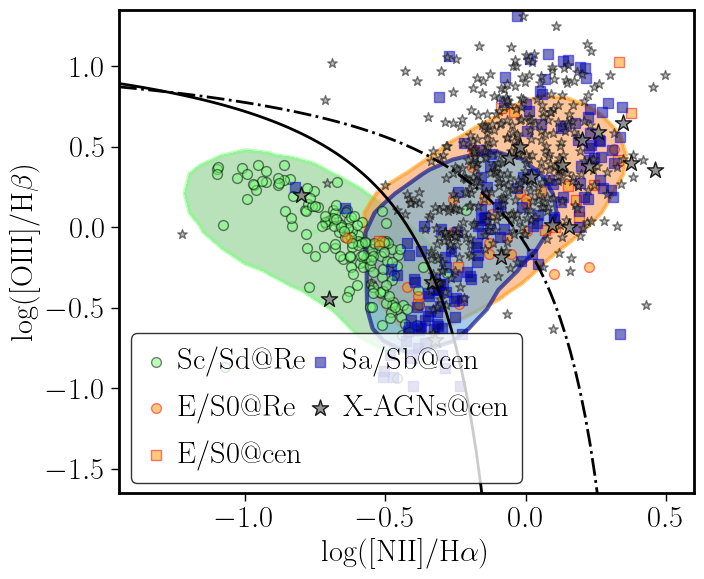

In [57]:
c_DL='black'
x_min=-1.45
x_max=0.6
y_min=-1.65
y_max=1.35

fig, ax = plt.subplots(1,figsize=(7.5,6.25))
#fig, ax = plt.subplots(1,figsize=(7.5,5.5))
#fig, ax = plt.subplots(1,figsize=(8,6))
#size=50

#
#ax.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],color='none', edgecolor='red')

#
# MaNGA
#
#ax.scatter(tab_MaNGA['log_NII_Ha_Re'][mask_SF_c_MaNGA],tab_MaNGA['log_OIII_Hb_Re'][mask_SF_c_MaNGA],s=size,marker='+',\
#           color=c_late, edgecolor='black',alpha=0.5)

#ax.scatter(tab_MaNGA['log_NII_Ha_Re'][mask_RG_c_MaNGA],tab_MaNGA['log_OIII_Hb_Re'][mask_RG_c_MaNGA],s=size,marker='+',\
#           color=c_early, edgecolor=c_early,alpha=0.5)

#ax.scatter(tab_MaNGA['log_NII_Ha_cen_mean'][mask_RG_c_MaNGA],tab_MaNGA['log_OIII_Hb_cen_mean'][mask_RG_c_MaNGA],s=size,marker='+',\
#           color=c_early, edgecolor=c_early,alpha=0.5)


my_contourf(ax,tab_MaNGA['log_NII_Ha_Re'][mask_SF_c_MaNGA],\
           tab_MaNGA['log_OIII_Hb_Re'][mask_SF_c_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_late,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greens',colors=None)

x=[]
y=[]
for tab_now in tab_MaNGA['log_NII_Ha_cen_mean','log_OIII_Hb_cen_mean'][mask_RG_c_MaNGA]:
    x.append(tab_now['log_NII_Ha_cen_mean'])
    y.append(tab_now['log_OIII_Hb_cen_mean'])
for tab_now in tab_MaNGA['log_NII_Ha_Re','log_OIII_Hb_Re'][mask_RG_c_MaNGA]:
    x.append(tab_now['log_NII_Ha_Re'])
    y.append(tab_now['log_OIII_Hb_Re'])
    
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_early,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Oranges',colors=None)


x=[]
y=[]
for tab_now in tab_MaNGA['lsigma_cen_Ha','EW_Ha_cen_mean','log_OIII_Hb_cen_mean','log_NII_Ha_cen_mean']:
    O3=tab_now['log_OIII_Hb_cen_mean']
    N2=tab_now['log_NII_Ha_cen_mean']
    EW=np.abs(tab_now['EW_Ha_cen_mean'])
    cut_Kew=0.61/(N2-0.47)+1.19  
    if ((O3>cut_Kew)&(EW>3)):
        x.append(N2)
        y.append(O3)
    
x=np.array(x)
y=np.array(y)
#my_contourf(ax,x,y,\
#                   x_min,x_max,y_min,y_max,c_color=c_agn,\
#            nbins=25,title='',linewidths=3,alpha=0.5,\
#                   conts=[0.85,0.01],cmap='Blues',colors=None)



my_contourf(ax,tab_MaNGA['log_NII_Ha_Re'][mask_ES_c_MaNGA],\
           tab_MaNGA['log_OIII_Hb_Re'][mask_ES_c_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_agn,\
            nbins=25,title='',linewidths=3,alpha=0.6,\
                   conts=[0.9,0.01],cmap='Blues',colors=None)


#
# CALIFA
#
ax.scatter(N2_out[mask_SF_c],O3_out[mask_SF_c],s=size,marker='o',\
           color=c_late, edgecolor='black',alpha=0.5,label='Sc/Sd@Re')

#ax.scatter(N2_out[mask_SF_c],O3_out[mask_SF_c],s=size,marker='o',\
#           color=c_late, edgecolor='black',alpha=0.5,label='Sc/Sd@Re')

ax.scatter(N2_out[mask_RG_c],O3_out[mask_RG_c],s=size,marker='o',\
           color=c_early, edgecolor='red',alpha=0.5,label='E/S0@Re')
ax.scatter(N2_cen[mask_RG_c],O3_cen[mask_RG_c],s=size,marker='s',\
           color=c_early, edgecolor='red',alpha=0.5,label='E/S0@cen')

#ax.scatter(N2_cen[mask_RG_c],O3_cen[mask_RG_c],s=size,marker='s',\
#           color=c_early, edgecolor='red',alpha=0.5,label='E/S0@cen')

ax.scatter(N2_cen[mask_ES_c],O3_cen[mask_ES_c],s=size,marker='s',\
           color=c_agn, edgecolor='blue',alpha=0.5,label='Sa/Sb@cen')

#ax.scatter(N2_cen[mask_Opt_AGNs_c],O3_cen[mask_Opt_AGNs_c],s=size,marker='s',\
#           color=c_agn, edgecolor='blue',alpha=0.5,label='O-AGNs@cen')

ax.scatter(tab_CA19['N2'],tab_CA19['O3'],s=size,marker='*',\
           color='grey', edgecolor='black',alpha=0.5,label='')

ax.scatter(N2_cen[mask_X_AGNs_c],O3_cen[mask_X_AGNs_c],s=3*size,marker='*',\
           color='grey', edgecolor='black',alpha=0.85,label='X-AGNs@cen')
x=np.linspace(-1.45,0.3,100)
cut_Kau=0.61/(x-0.05)+1.3
cut_Kew=0.61/(x-0.47)+1.19
ax.plot(x[x<0],cut_Kau[x<0],'-',color=c_DL,linewidth=2)
ax.plot(x,cut_Kew,'-.',color=c_DL,linewidth=2)

#ax.scatter(N2_cen[mask_RG],O3_cen[mask_RG],color='none', edgecolor='orange')
#ax.set_xlim(-1.45,0.6)
#ax.set_ylim(-1.65,1.2)

ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)

x_loc=0.02
y_loc=0.02
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
          handlelength=0.85,ncol=2,columnspacing=0.05,edgecolor='black')

ax.set_xlabel(r'log([NII]/H$\alpha$)')
ax.set_ylabel(r'log([OIII]/H$\beta$)')
plt.tight_layout()
out_dir='fig_diag'
out_fig=out_dir+'/old_BPT_morph.pdf'
fig.savefig(out_fig, transparent=False, facecolor='white', edgecolor='white')#.pdf")

print(len(tab[mask_X_AGNs_c]))

In [58]:
mask_d_SF_MaNGA =  (tab_MaNGA['lsigma_Re_Ha']<1.75)&(np.log10(np.abs(tab_MaNGA['EW_Ha_Re']))>0.78)&(tab_MaNGA['disp_Ha']>0)&(tab_MaNGA['lsigma_Re_Ha']<((np.log10(np.abs(tab_MaNGA['EW_Ha_Re']))+5)/3))
mask_d_SF_cen_MaNGA =  (tab_MaNGA['lsigma_cen_Ha']<1.75)&(np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean']))>0.78)&(tab_MaNGA['sigma_cen_Ha']>0)&(tab_MaNGA['lsigma_cen_Ha']<((np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean']))+5)/3))


mask_d_RG_MaNGA =  (tab_MaNGA['lsigma_Re_Ha']>-1)&(np.log10(np.abs(tab_MaNGA['EW_Ha_Re']))<0.47)&(tab_MaNGA['disp_Ha']>0)
mask_d_RG_MaNGA_cen =  (tab_MaNGA['lsigma_cen_Ha']>-1)&(np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean']))<0.47)&(tab_MaNGA['sigma_cen_Ha']>0)

mask_d_wAGN_MaNGA =  (tab_MaNGA['lsigma_cen_Ha']>1.85)&(np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean']))>0.47)&(tab_MaNGA['sigma_cen_Ha']>0)&(np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean']))<1.0)

mask_d_sAGN_MaNGA =  (tab_MaNGA['lsigma_cen_Ha']>1.85)&(np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean']))>1.0)&(tab_MaNGA['sigma_cen_Ha']>0)

mask_d_AGN_MaNGA =  (tab_MaNGA['lsigma_cen_Ha']>1.85)&(np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean']))>0.47)&(tab_MaNGA['sigma_cen_Ha']>0)







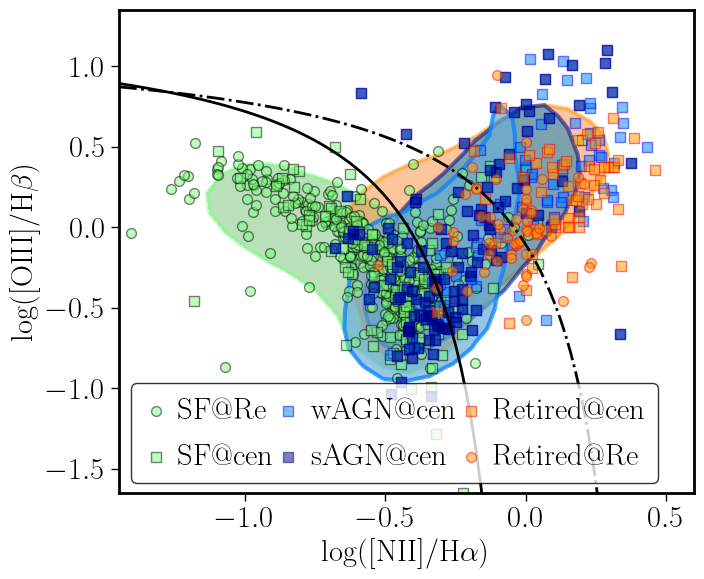

In [59]:
c_DL='black'


mask_SN = (tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)

#mask_SN = (tab['e_O3_cen']<0.1)&(tab['e_N2_cen']<0.1)&(tab['sigma_cen_Ha']>0)
#plt.scatter(N2_cen[mask_SN],O3_cen[mask_SN],c=tab['disp_vel_elines_cen'][mask_SN],cmap='Greys_r')
#mask_d_SF =  (tab['lsigma_cen_Ha']<2.1)&(tab['WHa_cen']>0.78)&(tab['e_O3_cen']<0.1)&(tab['e_N2_cen']<0.1)&(tab['sigma_cen_Ha']>0)
mask_d_SF =  (tab['lsigma_Re_Ha']<1.75)&(tab['WHa_out']>0.78)&(tab['e_O3_out']<0.3)&(tab['e_N2_out']<0.3)&(tab['disp_Ha']>0)&(tab['lsigma_Re_Ha']<((tab['WHa_out']+5)/3))
mask_d_SF_cen =  (tab['lsigma_cen_Ha']<1.75)&(tab['WHa_cen']>0.78)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)&(tab['lsigma_cen_Ha']<((tab['WHa_cen']+5)/3))

mask_d_RG = (tab['lsigma_cen_Ha']>1.8)&(tab['WHa_cen']<0.47)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)
mask_d_AGN = (tab['lsigma_cen_Ha']>1.8)&(tab['WHa_cen']>0.47)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)
mask_d_sAGN = (tab['lsigma_cen_Ha']>1.8)&(tab['WHa_cen']>1.0)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)

mask_U = ~((mask_d_SF)&(mask_d_RG)&(mask_d_AGN))

#plt.scatter(N2_int,O3_int,c=tab['disp_vel_elines_int'])
#plt.scatter(N2_out,O3_out,c=tab['disp_vel_elines_out'])
#plt.scatter(N2_cen[mask_d_SF],O3_cen[mask_d_SF],color='none', edgecolor='green')
#plt.scatter(N2_out[mask_U],O3_out[mask_U],marker='+',color='black', edgecolor='black',alpha=0.5)

#
fig, ax = plt.subplots(1,figsize=(7.5,6.25))
#fig, ax = plt.subplots(1,figsize=(7.5,5.5))
#size=50
mask_c = (tab['sigma_cen_Ha']>0)
#mask_SF_c = ma

# MaNGA

my_contourf(ax,tab_MaNGA['log_NII_Ha_Re'][mask_d_SF_MaNGA],\
           tab_MaNGA['log_OIII_Hb_Re'][mask_d_SF_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_late,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greens',colors=None)

x=[]
y=[]
for tab_now in tab_MaNGA['log_NII_Ha_cen_mean','log_OIII_Hb_cen_mean'][mask_d_RG_MaNGA]:
    x.append(tab_now['log_NII_Ha_cen_mean'])
    y.append(tab_now['log_OIII_Hb_cen_mean'])
for tab_now in tab_MaNGA['log_NII_Ha_Re','log_OIII_Hb_Re'][mask_d_RG_MaNGA_cen]:
    x.append(tab_now['log_NII_Ha_Re'])
    y.append(tab_now['log_OIII_Hb_Re'])
    
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_early,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Oranges',colors=None)




my_contourf(ax,tab_MaNGA['log_NII_Ha_cen_mean'][mask_d_wAGN_MaNGA],\
           tab_MaNGA['log_OIII_Hb_cen_mean'][mask_d_wAGN_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_sAGN,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='winter',colors=None)

my_contourf(ax,tab_MaNGA['log_NII_Ha_cen_mean'][mask_d_sAGN_MaNGA],\
           tab_MaNGA['log_OIII_Hb_cen_mean'][mask_d_sAGN_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_wAGN,\
            nbins=25,title='',linewidths=3,alpha=0.7,\
                   conts=[0.9,0.01],cmap='Blues',colors=None)









#
#ax.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],color='none', edgecolor='red')

ax.scatter(N2_out[mask_d_SF],O3_out[mask_d_SF],s=size,marker='o',\
           color=c_SF, edgecolor='black',alpha=0.5,label='SF@Re')
ax.scatter(N2_cen[mask_d_SF_cen],O3_cen[mask_d_SF_cen],s=size,\
           marker='s',color=c_SF, edgecolor='black',alpha=0.5,label='SF@cen')

ax.scatter(N2_cen[mask_d_AGN],O3_cen[mask_d_AGN],s=size,marker='s',\
           color=c_wAGN, edgecolor='blue',alpha=0.5,label='wAGN@cen')
ax.scatter(N2_cen[mask_d_sAGN],O3_cen[mask_d_sAGN],s=size,marker='s',\
           color=c_sAGN, edgecolor=c_sAGN,alpha=0.5,label='sAGN@cen')

ax.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],s=size,marker='s',\
           color=c_RG, edgecolor='red',alpha=0.5,label='Retired@cen')
ax.scatter(N2_out[mask_d_RG],O3_out[mask_d_RG],s=size,marker='o',\
           color=c_RG, edgecolor='red',alpha=0.5,label='Retired@Re')
x=np.linspace(-1.45,0.3,100)
cut_Kau=0.61/(x-0.05)+1.3
cut_Kew=0.61/(x-0.47)+1.19
ax.plot(x[x<0],cut_Kau[x<0],'-',color=c_DL,linewidth=2)
ax.plot(x,cut_Kew,'-.',color=c_DL,linewidth=2)

#ax.scatter(N2_cen[mask_RG],O3_cen[mask_RG],color='none', edgecolor='orange')
#ax.set_xlim(-1.45,0.6)
#ax.set_ylim(-1.65,1.2)

ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)

x_loc=0.02
y_loc=0.02
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
          handlelength=0.85,ncol=3,columnspacing=0.05,edgecolor='black')

ax.set_xlabel(r'log([NII]/H$\alpha$)')
ax.set_ylabel(r'log([OIII]/H$\beta$)')
plt.tight_layout()
out_dir='fig_diag'
out_fig=out_dir+'/new_BPT_wAGNs.pdf'
fig.savefig(out_fig, transparent=False, facecolor='white', edgecolor='white')#.pdf")


In [60]:
cut_Kew=0.61/(N2_cen-0.47)+1.19

print('X-AGNs SN good = ',len(tab[mask_X_AGNs_c]))
print('X-AGNs & opt-AGNs = ',len(tab[mask_X_AGNs_c & (O3_cen>cut_Kew) & (tab['WHa_cen']>0.47)]))
print('X-AGNs & SF = ',len(tab[mask_X_AGNs_c & (O3_cen<cut_Kew) & (tab['WHa_cen']>0.47)]))
print('X-AGNs & RG = ',len(tab[mask_X_AGNs_c & (tab['WHa_cen']<=0.47)]))

mask_d_AGN = (tab['lsigma_cen_Ha']>1.7)&(tab['WHa_cen']>=0.47)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)

print('---------------------')
print('X-AGNs SN good = ',len(tab[mask_X_AGNs_c]))
#print('X-AGNs & sAGNs = ',len(tab[mask_X_AGNs_c & mask_d_sAGN]))
print('X-AGNs & AGNs = ',len(tab[mask_X_AGNs_c & mask_d_AGN]))
print('X-AGNs & SF = ',len(tab[mask_X_AGNs_c & mask_d_SF]))
print('X-AGNs & RG = ',len(tab[mask_X_AGNs_c & (tab['WHa_cen']<=0.47)]))

X-AGNs SN good =  18
X-AGNs & opt-AGNs =  7
X-AGNs & SF =  3
X-AGNs & RG =  8
---------------------
X-AGNs SN good =  18
X-AGNs & AGNs =  10
X-AGNs & SF =  5
X-AGNs & RG =  8


In [61]:
print(len(tab[mask_X_AGNs]))
#mask_SN = (tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)
print(len(tab[mask_X_AGNs & mask_SN]))
#mask_SN = (tab['e_O3_cen']<0.1)&(tab['e_N2_cen']<0.1)&(tab['sigma_cen_Ha']>0)

30
16


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.100e+01, 3.200e+02, 9.855e+03]),
 array([-487.27630821, -438.54867739, -389.82104657, -341.09341575,
        -292.36578493, -243.63815411, -194.91052329, -146.18289246,
         -97.45526164,  -48.72763082,    0.        ]),
 <BarContainer object of 10 artists>)

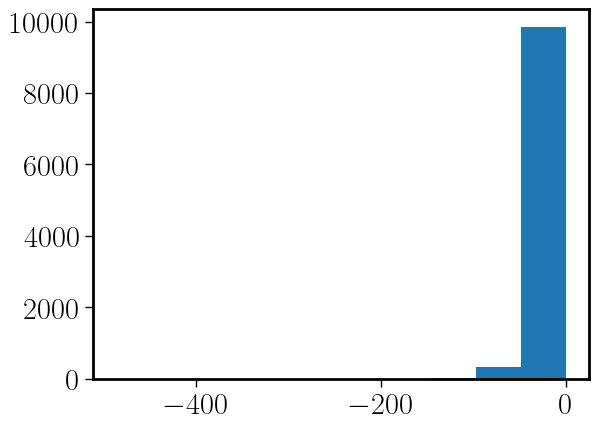

In [62]:
#
# New selection
#

plt.hist(tab_MaNGA['EW_Ha_Re'])#

N.SF MaNGA= 4954
N.RG MaNGA= 4486


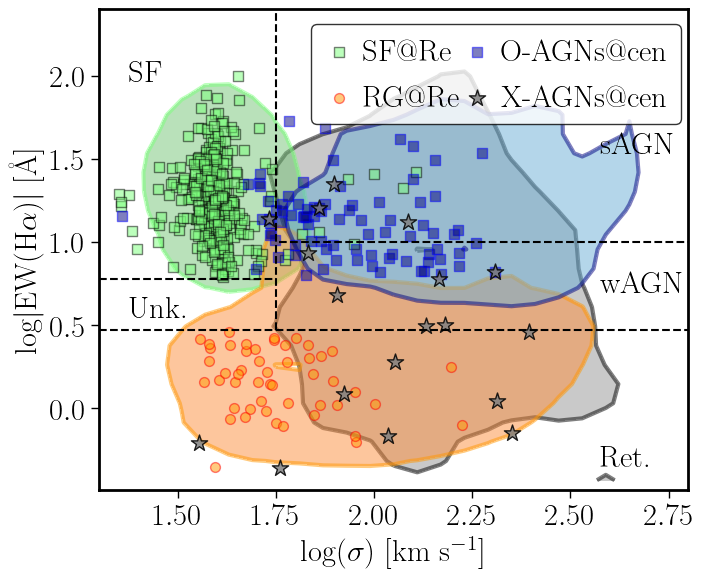

In [63]:
#
# CALIFA
#
mask_SF = tab['type']!='Irr' #(tab['type']=='Sc') | (tab['type']=='Sd') | (tab['type']=='Scd') #| (tab['type']=='Sbc') 
mask_SF = mask_SF #& (tab['log_Mass']<10.75) & (np.abs(tab['EW_Ha_Re'])>3) #& (np.abs(tab['EW_Ha_Re'])<10)
mask_ES = tab['type']!='Irr'  #(tab['type']=='Sa') | (tab['type']=='Sab') | (tab['type']=='Sb') #| (tab['type']=='Sbc') 
#mask_ES = mask_ES & (tab['log_Mass']>10.75) #& (np.abs(tab['EW_Ha_Re'])>3)& (np.abs(tab['EW_Ha_Re'])>10)
cut_Kew_int=0.61/(N2_int-0.47)+1.19
cut_Kew_cen=0.61/(N2_cen-0.47)+1.19
cut_Kew_out=0.61/(N2_out-0.47)+1.19


mask_RG = tab['type']!='Irr' #(tab['type']=='E') | (tab['type']=='S0') #| (tab['type']=='Scd') | (tab['type']=='Sbc')
mask_SF = mask_SF & (tab['X_AGNs']==0) & (tab['outflows']==0) & (O3_out<cut_Kew_out) & (np.abs(tab['WHa_out'])>0.78)
mask_ES = mask_ES & (tab['X_AGNs']==0) & (tab['outflows']==0) & (O3_out<cut_Kew_out) & (np.abs(tab['WHa_out'])>0.78)
mask_RG = mask_RG & (tab['X_AGNs']==0) & (tab['outflows']==0) & (np.abs(tab['WHa_out'])<0.47) & (np.abs(tab['WHa_cen'])<0.47)
mask_X_AGNs = (tab['X_AGNs']==1) & (tab['outflows']==0)
mask_outflows = (tab['X_AGNs']==0) & (tab['outflows']==1)
mask_Opt_AGNs = (tab['Opt_AGNs']==1) & (tab['outflows']==0)
mask_c = (tab['sigma_cen_Ha']>0)
mask_SF_c = mask_SF & (tab['sigma_cen_Ha']>0)
mask_ES_c = mask_ES & (tab['sigma_cen_Ha']>0)
mask_RG_c = mask_RG & (tab['sigma_cen_Ha']>0)
mask_X_AGNs_c = mask_X_AGNs & (tab['sigma_cen_Ha']>0)
mask_Opt_AGNs_c = mask_Opt_AGNs & (tab['sigma_cen_Ha']>0) #& mask_ES
mask_outflows_c = mask_outflows & (tab['sigma_cen_Ha']>0)

#
# MaNGA
#
#{-2: 'CD', -1: 'E', 0: 'S0', 1: 'Sa', 2: 'Sab', 3: 'Sb', 4: 'Sbc', 5: 'Sc', 6: 'Scd', 7: 'Sd', 8: 'Sdm', 9: 'Sm', 10: 'Irr'}
# 

O3_MaNGA_Re=tab_MaNGA['log_OIII_Hb_cen_mean']
N2_MaNGA_Re=tab_MaNGA['log_NII_Ha_cen_mean']
EW=np.abs(tab_MaNGA['EW_Ha_cen_mean'])
cut_Kew_MaNGA_Re=0.61/(tab_MaNGA['log_NII_Ha_Re']-0.47)+1.19  
cut_Kew_MaNGA_cen=0.61/(tab_MaNGA['log_NII_Ha_cen_mean']-0.47)+1.19  


mask_SF_MaNGA = (tab_MaNGA['best_type_n']>-3)  & (tab_MaNGA['log_OIII_Hb_Re']<cut_Kew_MaNGA_Re)  &(np.abs(tab_MaNGA['EW_Ha_Re'])>6)#
print('N.SF MaNGA=',len(tab_MaNGA[mask_SF_MaNGA]))

#(tab_MaNGA['best_type_n']>4) & (tab_MaNGA['best_type_n']<9)
mask_ES_MaNGA = (tab_MaNGA['best_type_n']>-3) # (tab_MaNGA['best_type_n']>0) & (tab_MaNGA['best_type_n']<3) & (tab_MaNGA['log_Mass']>10.5) & (np.abs(tab_MaNGA['EW_Ha_Re'])>3) #& (np.abs(tab_MaNGA['EW_Ha_Re'])<10)
mask_RG_MaNGA = (tab_MaNGA['best_type_n']>-3) & (np.abs(tab_MaNGA['EW_Ha_Re'])<3)#
print('N.RG MaNGA=',len(tab_MaNGA[mask_RG_MaNGA]))

# (tab_MaNGA['best_type_n']>-2) & (tab_MaNGA['best_type_n']<1) & (tab_MaNGA['log_Mass']>10.5) & (np.abs(tab_MaNGA['EW_Ha_Re'])<15)
mask_c_MaNGA = (tab_MaNGA['sigma_cen_Ha']>0)
mask_SF_c_MaNGA = mask_SF_MaNGA & mask_c_MaNGA
mask_ES_c_MaNGA = mask_ES_MaNGA & mask_c_MaNGA
mask_RG_c_MaNGA = mask_RG_MaNGA & mask_c_MaNGA
#print(len(tab_MaNGA[mask_SF_c_MaNGA]))

#800000
#ff9700
#7bff7b
#0080ff
#000080

c_early='#ff9700'
c_agn='#000080'
c_late='#7bff7b'

c_SF=c_late#'grey'
c_RG=c_early
c_sAGN=c_agn#'blue'
c_wAGN='#0080ff'#'cyan'
x_min=1.3
x_max=2.8
y_min=-0.49
#y_max=3.1
y_max=2.4


fig, ax = plt.subplots(1,figsize=(7.5,6.25))
#fig, ax = plt.subplots(1,figsize=(8,6))

size=50



#ax.scatter(tab['lsigma_Re_Ha'][mask_SF_c],tab['WHa_int'][mask_SF_c],c=tab['N2_int'][mask_SF_c])
#
# MaNGA data
#
#ax.scatter(tab_MaNGA['lsigma_Re_Ha'][mask_SF_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_SF_c_MaNGA])),s=size,\
#           marker='+',color=c_late, edgecolor='black',alpha=0.5)


# CA19
my_contourf(ax,tab_CA19['lsigma_Ha'],\
           tab_CA19['WHa'],\
                   x_min,x_max,y_min,y_max,c_color='black',\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greys',colors=None)



my_contourf(ax,tab_MaNGA['lsigma_Re_Ha'][mask_SF_c_MaNGA],\
           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_SF_c_MaNGA])),\
                   x_min,x_max,y_min,y_max,c_color=c_late,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greens',colors=None)

x=[]
y=[]
for tab_now in tab_MaNGA['lsigma_cen_Ha','EW_Ha_cen_mean'][mask_RG_c_MaNGA]:
    x.append(tab_now['lsigma_cen_Ha'])
    y.append(np.log10(np.abs(tab_now['EW_Ha_cen_mean'])))
for tab_now in tab_MaNGA['lsigma_Re_Ha','EW_Ha_Re'][mask_RG_c_MaNGA]:
    x.append(tab_now['lsigma_Re_Ha'])
    y.append(np.log10(np.abs(tab_now['EW_Ha_Re'])))
    
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_early,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.85,0.01],cmap='Oranges',colors=None)


x=[]
y=[]
for tab_now in tab_MaNGA['lsigma_cen_Ha','EW_Ha_cen_mean','log_OIII_Hb_cen_mean','log_NII_Ha_cen_mean']:
    O3=tab_now['log_OIII_Hb_cen_mean']
    N2=tab_now['log_NII_Ha_cen_mean']
    EW=np.abs(tab_now['EW_Ha_cen_mean'])
    cut_Kew=0.61/(N2-0.47)+1.19  
    if ((O3>cut_Kew)&(EW>6)):
        x.append(tab_now['lsigma_cen_Ha'])
        y.append(np.log10(np.abs(tab_now['EW_Ha_cen_mean'])))
    
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_agn,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.85,0.01],cmap='Blues',colors=None)

#my_contourf(ax,tab_MaNGA['lsigma_cen_Ha'][mask_ES_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean'][mask_ES_c_MaNGA])),\
#                   x_min,x_max,y_min,y_max,c_color=c_agn,\
#            nbins=25,title='',linewidths=3,alpha=0.6,\
#                   conts=[0.85,0.01],cmap='Blues',colors=None)


#my_contourf(ax,tab_MaNGA['lsigma_Re_Ha'][mask_RG_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_RG_c_MaNGA])),\
#                   x_min,x_max,y_min,y_max,c_color=c_early,\
#            nbins=25,title='',linewidths=3,alpha=0.6,\
#                   conts=[0.7,0.01],cmap='Reds',colors=1)


#ax.scatter(tab_MaNGA['lsigma_Re_Ha'][mask_RG_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_Re'][mask_RG_c_MaNGA])),s=size,\
#           marker='+',color=c_early, edgecolor='black',alpha=0.5)
#ax.scatter(tab_MaNGA['lsigma_cen_Ha'][mask_RG_c_MaNGA],\
#           np.log10(np.abs(tab_MaNGA['EW_Ha_cen_mean'][mask_RG_c_MaNGA])),s=size,\
#           marker='+',color=c_early, edgecolor='black',alpha=0.5)

#
# CALIFA
#

ax.scatter(tab['lsigma_Re_Ha'][mask_SF_c],tab['WHa_out'][mask_SF_c],s=size,\
           marker='s',color=c_late, edgecolor='black',alpha=0.5,label='SF@Re')




#ax.scatter(tab['lsigma_cen_Ha'][mask_SF_c],tab['WHa_cen'][mask_SF_c],marker='o',color='grey', edgecolor='grey',alpha=0.5)

#ax.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],c=tab['N2_int'][mask_RG_c])

ax.scatter(tab['lsigma_Re_Ha'][mask_RG_c],tab['WHa_out'][mask_RG_c],s=size,\
           marker='o',color=c_early, edgecolor='red',alpha=0.5,label='RG@Re')
#ax.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],s=size,\
#           marker='s',color=c_early, edgecolor='red',alpha=0.5,label='E/S0@cen')

#ax.scatter(tab['lsigma_cen_Ha'][mask_ES_c],tab['WHa_cen'][mask_ES_c],s=size,\
#           marker='s',color=c_agn, edgecolor='blue',alpha=0.5,label='Sa/Sb@cen')

ax.scatter(tab['lsigma_cen_Ha'][mask_Opt_AGNs_c],tab['WHa_cen'][mask_Opt_AGNs_c],s=size,\
           marker='s',color=c_agn, edgecolor='blue',alpha=0.5,label='O-AGNs@cen')


#ax.scatter(tab['lsigma_cen_Ha'][mask_Opt_AGNs_c],tab['WHa_cen'][mask_Opt_AGNs_c],color='none', edgecolor='cyan')
#ax.scatter(tab['lsigma_cen_Ha'][mask_RG_c],tab['WHa_cen'][mask_RG_c],c=tab['N2_int'][mask_RG_c])
ax.scatter(tab['lsigma_cen_Ha'][mask_X_AGNs_c],\
           tab['WHa_cen'][mask_X_AGNs_c],s=3*size,marker='*',\
           color='grey', edgecolor='black',alpha=0.85,label='X-AGNs@cen')
           
#           ,s=1.5*size,\
#           marker='*',color='black', edgecolor='black',label='X-AGNs@cen')
#ax.scatter(tab['lsigma_Re_Ha'][mask_outflows_c],tab['WHa_out'][mask_outflows_c],color='none', edgecolor='orange')
lEW_cut=np.arange(0.78,1.3,0.5)
lsigma_cut=(lEW_cut+5)/3-0.243
#lsigma_cut=np.arange(1.75,2.3,0.1)
#lEW_cut =-5+3*lsigma_cut
#ax.plot(lsigma_cut,lEW_cut,'--',c='black')
ax.plot([x_min,1.75],[0.78,0.78],'--',c='black')
ax.plot([1.75,1.75],[0.47,y_max],'--',c='black')

#ax.plot([2.1-0.243,2.1-0.243],[lEW_cut[-1],2.2],'--',c='black')
ax.plot([x_min,x_max],[0.47,0.47],'--',c='black')
ax.plot([2-0.243,x_max],[1.0,1.0],'--',c='black')



#lEW_cut=np.arange(0.78,1.3,0.5)
#lsigma_cut=(lEW_cut+5)/3-0.243
#lsigma_cut=np.arange(1.75,2.3,0.1)
#lEW_cut =-5+3*lsigma_cut
#ax.plot(lsigma_cut,lEW_cut,'--',c='black')
#ax.plot([1.5,lsigma_cut[0]],[0.78,0.78],'--',c='black')
#ax.plot([2.1-0.243,2.1-0.243],[lEW_cut[-1],2.2],'--',c='black')
#ax.plot([1.5,x_max],[0.47,0.47],'--',c='black')
#ax.plot([2-0.243,x_max],[1.0,1.0],'--',c='black')

#ax.set_xlim(1.81,2.75)
#ax.set_xlim(1.5,2.5)
#ax.set_ylim(-0.49,2.1)
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)

ax.set_xlabel(r'log($\sigma$) [km s$^{-1}$]')
ax.set_ylabel(r'log$|$EW(H$\alpha$)$|$ [${\rm \AA}$]')
x_loc=0.36
y_loc=0.76
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
          handlelength=1.0,ncol=2,columnspacing=0.05,edgecolor='black')
ax.text(x_max-0.15*np.abs(x_max-x_min),y_min+0.05*np.abs(y_max-y_min),'Ret.')
ax.text(x_min+0.05*np.abs(x_max-x_min),y_max-0.15*np.abs(y_max-y_min),'SF')
ax.text(x_min+0.05*np.abs(x_max-x_min),0.55,'Unk.')
ax.text(x_max-0.15*np.abs(x_max-x_min),y_max-0.3*np.abs(y_max-y_min),'sAGN')
ax.text(x_max-0.15*np.abs(x_max-x_min),0.7,'wAGN')


#ax.set_xlim(1.81,2.75)
#ax.set_xlim(1.5,2.5)
#ax.set_ylim(-0.49,2.1)
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)


plt.tight_layout()
out_dir='fig_diag'
out_fig=out_dir+'/EW_disp.pdf'
fig.savefig(out_fig, transparent=False, facecolor='white', edgecolor='white')#.pdf")

        #    plt.setp(ax[1], ylim=ax[0].get_ylim())   

18


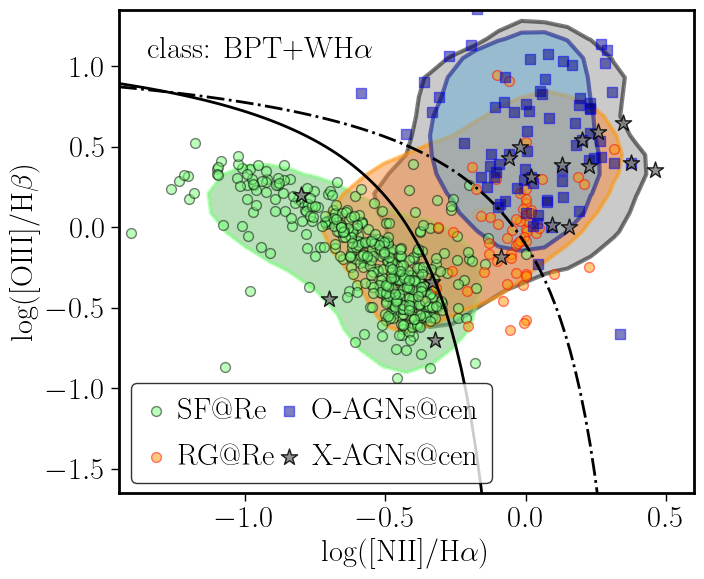

In [64]:
c_DL='black'
x_min=-1.45
x_max=0.6
y_min=-1.65
y_max=1.35

fig, ax = plt.subplots(1,figsize=(7.5,6.25))
#fig, ax = plt.subplots(1,figsize=(7.5,5.5))
#fig, ax = plt.subplots(1,figsize=(8,6))
#size=50

#
#ax.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],color='none', edgecolor='red')

#
# MaNGA
#
#ax.scatter(tab_MaNGA['log_NII_Ha_Re'][mask_SF_c_MaNGA],tab_MaNGA['log_OIII_Hb_Re'][mask_SF_c_MaNGA],s=size,marker='+',\
#           color=c_late, edgecolor='black',alpha=0.5)

#ax.scatter(tab_MaNGA['log_NII_Ha_Re'][mask_RG_c_MaNGA],tab_MaNGA['log_OIII_Hb_Re'][mask_RG_c_MaNGA],s=size,marker='+',\
#           color=c_early, edgecolor=c_early,alpha=0.5)

#ax.scatter(tab_MaNGA['log_NII_Ha_cen_mean'][mask_RG_c_MaNGA],tab_MaNGA['log_OIII_Hb_cen_mean'][mask_RG_c_MaNGA],s=size,marker='+',\
#           color=c_early, edgecolor=c_early,alpha=0.5)


# CA19
my_contourf(ax,tab_CA19['N2'],\
           tab_CA19['O3'],\
                   x_min,x_max,y_min,y_max,c_color='black',\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greys',colors=None)


my_contourf(ax,tab_MaNGA['log_NII_Ha_Re'][mask_SF_c_MaNGA],\
           tab_MaNGA['log_OIII_Hb_Re'][mask_SF_c_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_late,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greens',colors=None)

x=[]
y=[]
for tab_now in tab_MaNGA['log_NII_Ha_cen_mean','log_OIII_Hb_cen_mean'][mask_RG_c_MaNGA]:
    x.append(tab_now['log_NII_Ha_cen_mean'])
    y.append(tab_now['log_OIII_Hb_cen_mean'])
for tab_now in tab_MaNGA['log_NII_Ha_Re','log_OIII_Hb_Re'][mask_RG_c_MaNGA]:
    x.append(tab_now['log_NII_Ha_Re'])
    y.append(tab_now['log_OIII_Hb_Re'])
    
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_early,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Oranges',colors=None)


x=[]
y=[]
mask_AGN_MaNGA=[]
for tab_now in tab_MaNGA['lsigma_cen_Ha','EW_Ha_cen_mean','log_OIII_Hb_cen_mean','log_NII_Ha_cen_mean']:
    O3=tab_now['log_OIII_Hb_cen_mean']
    N2=tab_now['log_NII_Ha_cen_mean']
    EW=np.abs(tab_now['EW_Ha_cen_mean'])
    cut_Kew=0.61/(N2-0.47)+1.19  
    AGN_MaNGA=0
    if ((O3>cut_Kew)&(EW>3)):
        AGN_MaNGA=1
        x.append(N2)
        y.append(O3)
    if ((O3<cut_Kew)&(EW>6)):
        AGN_MaNGA=2
    if ((O3<cut_Kew)&(EW<3)):
        AGN_MaNGA=3
    mask_AGN_MaNGA.append(AGN_MaNGA)
mask_AGN_MaNGA=np.array(mask_AGN_MaNGA)
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_agn,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.85,0.01],cmap='Blues',colors=None)



#my_contourf(ax,tab_MaNGA['log_NII_Ha_Re'][mask_ES_c_MaNGA],\
#           tab_MaNGA['log_OIII_Hb_Re'][mask_ES_c_MaNGA],\
#                   x_min,x_max,y_min,y_max,c_color=c_agn,\
#            nbins=25,title='',linewidths=3,alpha=0.6,\
#                   conts=[0.9,0.01],cmap='Blues',colors=None)


#
# CALIFA
#
ax.scatter(N2_out[mask_SF_c],O3_out[mask_SF_c],s=size,marker='o',\
           color=c_late, edgecolor='black',alpha=0.5,label='SF@Re')

#ax.scatter(N2_out[mask_SF_c],O3_out[mask_SF_c],s=size,marker='o',\
#           color=c_late, edgecolor='black',alpha=0.5,label='Sc/Sd@Re')

ax.scatter(N2_out[mask_RG_c],O3_out[mask_RG_c],s=size,marker='o',\
           color=c_early, edgecolor='red',alpha=0.5,label='RG@Re')
#ax.scatter(N2_cen[mask_RG_c],O3_cen[mask_RG_c],s=size,marker='s',\
#           color=c_early, edgecolor='red',alpha=0.5,label='E/S0@cen')

ax.scatter(N2_cen[mask_Opt_AGNs_c],O3_cen[mask_Opt_AGNs_c],s=size,marker='s',\
           color=c_agn, edgecolor='blue',alpha=0.5,label='O-AGNs@cen')

#ax.scatter(tab_CA19['N2'],tab_CA19['O3'],s=size,marker='*',\
#           color='grey', edgecolor='black',alpha=0.5,label='')

ax.scatter(N2_cen[mask_X_AGNs_c],O3_cen[mask_X_AGNs_c],s=3*size,marker='*',\
           color='grey', edgecolor='black',alpha=0.85,label='X-AGNs@cen')

#ax.scatter(N2_cen[mask_X_AGNs_c],O3_cen[mask_X_AGNs_c],s=1.5*size,marker='*',\
#           color='black', edgecolor='black',alpha=0.85,label='X-AGNs@cen')
x=np.linspace(-1.45,0.3,100)
cut_Kau=0.61/(x-0.05)+1.3
cut_Kew=0.61/(x-0.47)+1.19
ax.plot(x[x<0],cut_Kau[x<0],'-',color=c_DL,linewidth=2)
ax.plot(x,cut_Kew,'-.',color=c_DL,linewidth=2)

#ax.scatter(N2_cen[mask_RG],O3_cen[mask_RG],color='none', edgecolor='orange')
#ax.set_xlim(-1.45,0.6)
#ax.set_ylim(-1.65,1.2)

ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)

x_loc=0.02
y_loc=0.02
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
          handlelength=0.85,ncol=2,columnspacing=0.05,edgecolor='black')

ax.text(x_min+0.05*np.abs(x_max-x_min),y_max-0.1*np.abs(y_max-y_min),r'class: BPT+WH$\alpha$')


ax.set_xlabel(r'log([NII]/H$\alpha$)')
ax.set_ylabel(r'log([OIII]/H$\beta$)')
plt.tight_layout()
out_dir='fig_diag'
out_fig=out_dir+'/old_BPT.pdf'
fig.savefig(out_fig, transparent=False, facecolor='white', edgecolor='white')#.pdf")

print(len(tab[mask_X_AGNs_c]))

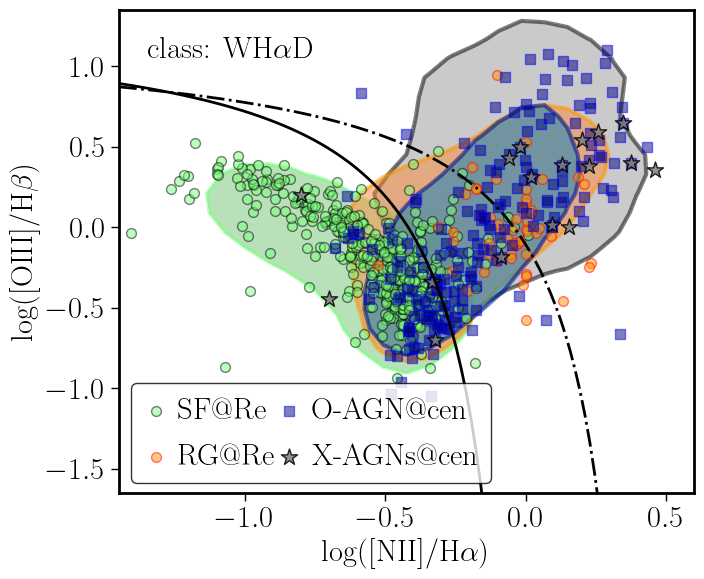

In [65]:
c_DL='black'


mask_SN = (tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)

mask_d_SF =  (tab['lsigma_Re_Ha']<1.75)&(tab['WHa_out']>0.78)&(tab['e_O3_out']<0.3)&(tab['e_N2_out']<0.3)&(tab['disp_Ha']>0)&(tab['lsigma_Re_Ha']<((tab['WHa_out']+5)/3))
mask_d_SF_cen =  (tab['lsigma_cen_Ha']<1.75)&(tab['WHa_cen']>0.78)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)&(tab['lsigma_cen_Ha']<((tab['WHa_cen']+5)/3))

mask_d_RG = (tab['lsigma_cen_Ha']>1.8)&(tab['WHa_cen']<0.47)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)
mask_d_AGN = (tab['lsigma_cen_Ha']>1.8)&(tab['WHa_cen']>0.47)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)
mask_d_sAGN = (tab['lsigma_cen_Ha']>1.8)&(tab['WHa_cen']>1.0)&(tab['e_O3_cen']<0.3)&(tab['e_N2_cen']<0.3)&(tab['sigma_cen_Ha']>0)

mask_U = ~((mask_d_SF)&(mask_d_RG)&(mask_d_AGN))

#plt.scatter(N2_int,O3_int,c=tab['disp_vel_elines_int'])
#plt.scatter(N2_out,O3_out,c=tab['disp_vel_elines_out'])
#plt.scatter(N2_cen[mask_d_SF],O3_cen[mask_d_SF],color='none', edgecolor='green')
#plt.scatter(N2_out[mask_U],O3_out[mask_U],marker='+',color='black', edgecolor='black',alpha=0.5)

#
fig, ax = plt.subplots(1,figsize=(7.5,6.25))
#fig, ax = plt.subplots(1,figsize=(7.5,5.5))
#size=50
mask_c = (tab['sigma_cen_Ha']>0)
#mask_SF_c = ma

# CA19
my_contourf(ax,tab_CA19['N2'],\
           tab_CA19['O3'],\
                   x_min,x_max,y_min,y_max,c_color='black',\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greys',colors=None)


# MaNGA

my_contourf(ax,tab_MaNGA['log_NII_Ha_Re'][mask_d_SF_MaNGA],\
           tab_MaNGA['log_OIII_Hb_Re'][mask_d_SF_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_late,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Greens',colors=None)

x=[]
y=[]
for tab_now in tab_MaNGA['log_NII_Ha_cen_mean','log_OIII_Hb_cen_mean'][mask_d_RG_MaNGA]:
    x.append(tab_now['log_NII_Ha_cen_mean'])
    y.append(tab_now['log_OIII_Hb_cen_mean'])
for tab_now in tab_MaNGA['log_NII_Ha_Re','log_OIII_Hb_Re'][mask_d_RG_MaNGA_cen]:
    x.append(tab_now['log_NII_Ha_Re'])
    y.append(tab_now['log_OIII_Hb_Re'])
    
x=np.array(x)
y=np.array(y)
my_contourf(ax,x,y,\
                   x_min,x_max,y_min,y_max,c_color=c_early,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='Oranges',colors=None)




my_contourf(ax,tab_MaNGA['log_NII_Ha_cen_mean'][mask_d_wAGN_MaNGA],\
           tab_MaNGA['log_OIII_Hb_cen_mean'][mask_d_wAGN_MaNGA],\
                   x_min,x_max,y_min,y_max,c_color=c_sAGN,\
            nbins=25,title='',linewidths=3,alpha=0.5,\
                   conts=[0.9,0.01],cmap='winter',colors=None)



#ax.scatter(tab_CA19['N2'],tab_CA19['O3'],s=size,marker='*',\
#           color='grey', edgecolor='black',alpha=0.5,label='')

#my_contourf(ax,tab_MaNGA['log_NII_Ha_cen_mean'][mask_d_sAGN_MaNGA],\
#           tab_MaNGA['log_OIII_Hb_cen_mean'][mask_d_sAGN_MaNGA],\
#                   x_min,x_max,y_min,y_max,c_color=c_wAGN,\
#            nbins=25,title='',linewidths=3,alpha=0.7,\
#                   conts=[0.9,0.01],cmap='Blues',colors=None)









#
#ax.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],color='none', edgecolor='red')

ax.scatter(N2_out[mask_d_SF],O3_out[mask_d_SF],s=size,marker='o',\
           color=c_SF, edgecolor='black',alpha=0.5,label='SF@Re')
#ax.scatter(N2_cen[mask_d_SF_cen],O3_cen[mask_d_SF_cen],s=size,\
#           marker='s',color=c_SF, edgecolor='black',alpha=0.5,label='SF@cen')
ax.scatter(N2_out[mask_d_RG],O3_out[mask_d_RG],s=size,marker='o',\
           color=c_RG, edgecolor='red',alpha=0.5,label='RG@Re')


ax.scatter(N2_cen[mask_d_AGN],O3_cen[mask_d_AGN],s=size,marker='s',\
           color=c_sAGN, edgecolor='blue',alpha=0.5,label='O-AGN@cen')
#ax.scatter(N2_cen[mask_d_sAGN],O3_cen[mask_d_sAGN],s=size,marker='s',\
#           color=c_sAGN, edgecolor=c_sAGN,alpha=0.5,label='sAGN@cen')

#ax.scatter(N2_cen[mask_d_RG],O3_cen[mask_d_RG],s=size,marker='s',\
#           color=c_RG, edgecolor='red',alpha=0.5,label='Retired@cen')


ax.scatter(N2_cen[mask_X_AGNs_c],O3_cen[mask_X_AGNs_c],s=3*size,marker='*',\
           color='grey', edgecolor='black',alpha=0.85,label='X-AGNs@cen')

#ax.scatter(N2_cen[mask_X_AGNs_c],O3_cen[mask_X_AGNs_c],s=1.5*size,marker='*',\
#           color='black', edgecolor='black',alpha=0.85,label='X-AGNs@cen')

x=np.linspace(-1.45,0.3,100)
cut_Kau=0.61/(x-0.05)+1.3
cut_Kew=0.61/(x-0.47)+1.19
ax.plot(x[x<0],cut_Kau[x<0],'-',color=c_DL,linewidth=2)
ax.plot(x,cut_Kew,'-.',color=c_DL,linewidth=2)

ax.text(x_min+0.05*np.abs(x_max-x_min),y_max-0.1*np.abs(y_max-y_min),r'class: WH$\alpha$D')

#ax.scatter(N2_cen[mask_RG],O3_cen[mask_RG],color='none', edgecolor='orange')
#ax.set_xlim(-1.45,0.6)
#ax.set_ylim(-1.65,1.2)

ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)

x_loc=0.02
y_loc=0.02
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
          handlelength=0.85,ncol=2,columnspacing=0.05,edgecolor='black')

ax.set_xlabel(r'log([NII]/H$\alpha$)')
ax.set_ylabel(r'log([OIII]/H$\beta$)')
plt.tight_layout()
out_dir='fig_diag'
out_fig=out_dir+'/new_BPT.pdf'
fig.savefig(out_fig, transparent=False, facecolor='white', edgecolor='white')#.pdf")


In [66]:
#O3_MaNGA_cen=tab_now['log_OIII_Hb_cen_mean']
print(len(tab))


mask_SF_BPT_out =  (O3_out<=cut_Kew_out) & (tab['WHa_out']>0.78) & mask_SN
mask_SF_BPT_cen =  (O3_out<=cut_Kew_cen) & (tab['WHa_out']>0.78) & mask_SN
mask_AGN_BPT_out =  (O3_out>cut_Kew_out) & (tab['WHa_out']>0.78) & mask_SN
mask_AGN_BPT_cen =  (O3_out>cut_Kew_cen) & (tab['WHa_out']>0.78) & mask_SN
mask_RG_BPT_out =  (tab['WHa_out']<0.47) & mask_SN
mask_RG_BPT_cen =  (tab['WHa_out']<0.47) & mask_SN

mask_SF_BPT_out_Kau =  (O3_out<=cut_Kau_out) & (tab['WHa_out']>0.78) & mask_SN


print(len(tab[mask_d_SF]),len(tab[mask_d_SF & mask_SF_BPT_out]),\
      len(tab[mask_d_SF & mask_RG_BPT_out]),len(tab[mask_d_SF & mask_AGN_BPT_out]))
print(len(tab[mask_d_RG]),len(tab[mask_d_RG & mask_SF_BPT_out]),\
      len(tab[mask_d_RG & mask_RG_BPT_out]),len(tab[mask_d_RG & mask_AGN_BPT_out]))
print(len(tab[mask_d_AGN]),len(tab[mask_d_AGN & mask_SF_BPT_cen]),\
      len(tab[mask_d_AGN & mask_RG_BPT_cen]),len(tab[mask_d_AGN & mask_AGN_BPT_cen]))

print('Ngal (SN ok in BPT diag)=',len(tab[mask_SN]))
print('out BPT[SF,RG,AGN]=',len(tab[mask_SF_BPT_out]),len(tab[mask_RG_BPT_out]),len(tab[mask_AGN_BPT_out]))
print('cen BPT[SF,RG,AGN]=',len(tab[mask_SF_BPT_cen]),len(tab[mask_RG_BPT_cen]),len(tab[mask_AGN_BPT_cen]))

print('cen _SF=',len(tab[mask_SF_BPT_cen & mask_d_SF]),len(tab[mask_RG_BPT_cen & mask_d_SF]),len(tab[mask_AGN_BPT_cen & mask_d_SF]))
print('cen _AGN=',len(tab[mask_SF_BPT_cen & mask_d_AGN]),len(tab[mask_RG_BPT_cen & mask_d_AGN]),len(tab[mask_AGN_BPT_cen & mask_d_AGN]))


print('out_Kau=',len(tab[mask_SF_BPT_out_Kau]),len(tab[mask_RG_BPT_out]),len(tab[mask_AGN_BPT_out]))

print('out RG = ranges =',len(tab[mask_RG_BPT_out & (O3_out<=cut_Kau_out)]),\
      len(tab[mask_RG_BPT_out & (cut_Kau_out<O3_out) & (O3_out<=cut_Kew_out)]),
      len(tab[mask_AGN_BPT_out & (O3_out>cut_Kew_out) ]))


#print(len(tab[mask_d_RG]),len(tab[mask_d_RG & (O3_out<cut_Kew_out) & (tab['WHa_out']>0.78)]),len(tab[mask_d_RG & & (O3_out<cut_Kew_out) & (tab['WHa_out']<0.47]),len(tab[mask_d_SF & (O3_cen>cut_Kew_cen) & (tab['WHa_cen']>0.78)]))


895
432 388 0 5
61 0 61 0
195 121 0 38
Ngal (SN ok in BPT diag)= 518
out BPT[SF,RG,AGN]= 397 63 15
cen BPT[SF,RG,AGN]= 371 63 44
cen _SF= 365 0 31
cen _AGN= 121 0 38
out_Kau= 366 63 15
out RG = ranges = 9 29 15


In [67]:
#print(mask_SF_c)

In [68]:
print('-- BPT+WHa-------------------')
print('X-AGNs SN good = ',len(tab[mask_X_AGNs_c]))
#print('X-AGNs & sAGNs = ',len(tab[mask_X_AGNs_c & mask_d_sAGN]))
print('X-AGNs & AGNs = ',len(tab[mask_X_AGNs_c & mask_AGN_BPT_cen]))
print('X-AGNs & SF = ',len(tab[mask_X_AGNs_c & mask_SF_BPT_cen]))
print('X-AGNs & RG = ',len(tab[mask_X_AGNs_c & mask_RG_BPT_cen]))

print('-- WHaD-------------------')
print('X-AGNs SN good = ',len(tab[mask_X_AGNs_c]))
#print('X-AGNs & sAGNs = ',len(tab[mask_X_AGNs_c & mask_d_sAGN]))
print('X-AGNs & AGNs = ',len(tab[mask_X_AGNs_c & mask_d_AGN]))
print('X-AGNs & SF = ',len(tab[mask_X_AGNs_c & mask_d_SF]))
print('X-AGNs & RG = ',len(tab[mask_X_AGNs_c & mask_d_RG]))

-- BPT+WHa-------------------
X-AGNs SN good =  18
X-AGNs & AGNs =  3
X-AGNs & SF =  3
X-AGNs & RG =  6
-- WHaD-------------------
X-AGNs SN good =  18
X-AGNs & AGNs =  9
X-AGNs & SF =  5
X-AGNs & RG =  5


In [69]:
print(len(tab_MaNGA))

10220


In [70]:
print(len(tab_MaNGA[mask_SF_MaNGA]))
print(len(tab_MaNGA[mask_d_SF_MaNGA]))

4954
4482


In [71]:
print(len(tab_MaNGA[mask_SF_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA & mask_d_SF_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA & mask_d_RG_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA & mask_d_wAGN_MaNGA]),
     )

4954 4475 0 650


In [72]:
m_AGN_MaNGA = mask_AGN_MaNGA==1
print(len(tab_MaNGA[m_AGN_MaNGA]),\
      len(tab_MaNGA[m_AGN_MaNGA & mask_d_SF_MaNGA]),\
      len(tab_MaNGA[m_AGN_MaNGA & mask_d_RG_MaNGA]),\
      len(tab_MaNGA[m_AGN_MaNGA & mask_d_wAGN_MaNGA]),
     )

493 190 102 291


In [73]:
m_AGN_MaNGA = mask_AGN_MaNGA==1
m_SF_MaNGA = mask_AGN_MaNGA==2
m_RG_MaNGA = mask_AGN_MaNGA==3
#m_AGN_MaNGA = mask_AGN_MaNGA==1

print(len(tab_MaNGA[m_AGN_MaNGA]),\
      len(tab_MaNGA[m_AGN_MaNGA & mask_d_SF_cen_MaNGA]),\
      len(tab_MaNGA[m_AGN_MaNGA & mask_d_RG_MaNGA_cen]),\
      len(tab_MaNGA[m_AGN_MaNGA & mask_d_AGN_MaNGA]),
     )

493 1 0 470


In [74]:
print(len(tab_MaNGA[mask_SF_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA & mask_d_SF_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA & mask_d_RG_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA & mask_d_AGN_MaNGA]),
     )

4954 4475 0 1777


In [75]:
print(len(tab_MaNGA[mask_d_AGN_MaNGA]),\
      len(tab_MaNGA[mask_d_AGN_MaNGA & m_SF_MaNGA]),\
      len(tab_MaNGA[mask_d_AGN_MaNGA & m_RG_MaNGA]),\
      len(tab_MaNGA[mask_d_AGN_MaNGA & m_AGN_MaNGA]),
     )

2360 1456 5 470


In [76]:
#
# CB19
#

mask_d_SF_CA19 =  (tab_CA19['lsigma_Ha']<1.75)&(tab_CA19['WHa']>0.78)
mask_d_RG_CA19 = (tab_CA19['WHa']<0.47)
mask_d_AGN_CA19 = (tab_CA19['lsigma_Ha']>1.75)&(tab_CA19['WHa']>0.78)
mask_U_CA19 = ~((mask_d_SF_CA19)&(mask_d_RG_CA19)&(mask_d_AGN_CA19))


cut_Kew_CA19=0.61/(tab_CA19['N2']-0.47)+1.19
cut_Kau_CA19=0.61/(tab_CA19['N2']-0.05)+1.3

mask_SF_BPT_CA19 =  (tab_CA19['O3']<=cut_Kew_CA19) & (tab_CA19['WHa']>0.78) 
mask_AGN_BPT_CA19 =  (tab_CA19['O3']>cut_Kew_CA19) & (tab_CA19['WHa']>0.78) 
mask_RG_BPT_CA19 =  (tab_CA19['WHa']<0.47) 

mask_SF_BPT_CA19_Kau =  (tab_CA19['O3']<=cut_Kau_CA19) & (tab_CA19['WHa']>0.78) 
mask_AGN_BPT_CA19_Kau =  (tab_CA19['O3']>cut_Kau_CA19) & (tab_CA19['WHa']>0.78) 


print(len(tab_CA19))
print('BPT+WHa [SF,RG,O-AGNs] = ',len(tab_CA19[mask_SF_BPT_CA19]),len(tab_CA19[mask_RG_BPT_CA19]),len(tab_CA19[mask_AGN_BPT_CA19]))

print('BPT_Kauff+WHa [SF,RG,O-AGNs] = ',len(tab_CA19[mask_SF_BPT_CA19_Kau]),len(tab_CA19[mask_RG_BPT_CA19]),len(tab_CA19[mask_AGN_BPT_CA19_Kau]))

print('WHaD [SF,RG,O-AGNs] = ',len(tab_CA19[mask_d_SF_CA19]),len(tab_CA19[mask_d_RG_CA19]),len(tab_CA19[mask_d_AGN_CA19]))


424
BPT+WHa [SF,RG,O-AGNs] =  85 118 146
BPT_Kauff+WHa [SF,RG,O-AGNs] =  41 118 190
WHaD [SF,RG,O-AGNs] =  4 118 228


In [77]:
#mask_d_SF_cen_MaNGA

mask_SF_MaNGA_cen = (tab_MaNGA['best_type_n']>-3)  & (tab_MaNGA['log_OIII_Hb_cen_mean']<cut_Kew_MaNGA_Re)  &(np.abs(tab_MaNGA['EW_Ha_cen_mean'])>6)#
print('N.SF MaNGA cen=',len(tab_MaNGA[mask_SF_MaNGA_cen]))
print('N.AGN MaNGA cen=',len(tab_MaNGA[mask_d_AGN_MaNGA]))


print(len(tab_MaNGA[mask_SF_MaNGA_cen]),\
      len(tab_MaNGA[mask_SF_MaNGA_cen & mask_d_SF_cen_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA_cen & mask_d_RG_MaNGA]),\
      len(tab_MaNGA[mask_SF_MaNGA_cen & mask_d_AGN_MaNGA]),
     )

N.SF MaNGA cen= 4197
N.AGN MaNGA cen= 2360
4197 1181 95 1522
